# Estimate monthly $T_L$ 
---
We have updated the monthly $T_L$ values using local measurement data and split the data for evaluation purposes.


In [ ]:
import pandas as pd
all_sites_df = pd.read_csv("", parse_dates=['Datetime'])
all_sites_df.rename(columns={'measure_ghi':'I'}, inplace=True)
plant_df = pd.read_csv("solar_utils/metadata/plant_metadata.csv")

In [14]:
# loop for all sites
import importlib
from solar_utils.clearsky_detection import cal_TL_nls_with_eval, detect_clr_portion_pvlib
importlib.reload(importlib.import_module('solar_utils.clearsky_detection'))
TL_df = pd.DataFrame(index =[f"month {i}" for i in range(1, 13)])
data_detected_clr_ghi_df = pd.DataFrame()
data_detected_partly_clr_day_df = pd.DataFrame()
clr_date_df = pd.DataFrame()


train_all_sites_df = pd.DataFrame()
test_all_sites_df = pd.DataFrame()

window_length=45
max_diff=100
mean_diff=75 
slope_dev=100
freq='15min'
max_iterations = 30


for site_no in range(1, 57):
    sitename = f"site{('00'+str(site_no))[-3:]}"
    if site_no in [32, 45, 54]:
        continue

    site_df = all_sites_df[all_sites_df['site_name']==sitename].copy()
    site_df.set_index('Datetime', inplace=True)
    site_df = site_df.between_time("07:00", "17:00")
    site_df.reset_index(inplace=True)

    site_alt = plant_df[plant_df['site_name']==sitename]['alt'].values[0]
    site_lat = plant_df[plant_df['site_name']==sitename]['latt'].values[0]
    site_long = plant_df[plant_df['site_name']==sitename]['long'].values[0]
    start_date = "2022-01-01"
    end_date = "2023-07-01"
    freq = '15min'

    detected_clr_ghi_df, detected_partly_clr_day_df, clr_date_list = detect_clr_portion_pvlib(site_df, window_length=window_length, max_diff=max_diff, mean_diff= mean_diff, 
                                                                                            freq=freq, slope_dev=slope_dev, max_iterations=max_iterations)
    
    clr_date_site = pd.DataFrame()
    clr_date_site['clr_date'] = clr_date_list
    clr_date_site['sitename'] = sitename
    clr_date_df = pd.concat([clr_date_df,clr_date_site],axis=0,ignore_index=True)

    data_detected_clr_ghi_df = pd.concat([data_detected_clr_ghi_df, detected_clr_ghi_df], axis=0, ignore_index=True)
    data_detected_partly_clr_day_df = pd.concat([data_detected_partly_clr_day_df, detected_partly_clr_day_df], axis=0, ignore_index=True)

    TL_array, train_site_df, test_site_df = cal_TL_nls_with_eval(clr_data_df=data_detected_clr_ghi_df, alt=site_alt, test_size=0.2, random_state=42)
    TL_df[sitename] = TL_array.flatten()

    train_site_df['sitename'] = sitename
    test_site_df['sitename'] = sitename

    train_all_sites_df = pd.concat([train_all_sites_df, train_site_df], axis=0, ignore_index=True)
    test_all_sites_df = pd.concat([test_all_sites_df, test_site_df], axis=0, ignore_index=True)

    print(f"finished {sitename}")


TL_df = TL_df.T
TL_df.to_csv("monthly_TL_for_eval.csv")


2022-01-02 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-14 is terminated
2022-01-17 is terminated
2022-01-21 is terminated
2022-01-27 is terminated
2022-01-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-03 is terminated
2022-02-06 is terminated
2022-02-09 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-22 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-30 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-17 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-25 is terminated
2022-07-27 is terminated
2022-07-29 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-09-16 is terminated
2022-09-18 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-05 is terminated
2022-10-06 is terminated
2022-10-07 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-11 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-17 is terminated
2022-10-21 is terminated
2022-10-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-26 is terminated
2022-10-27 is terminated
2022-11-01 is terminated
2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated
2022-11-08 is terminated
2022-11-10 is terminated
2022-11-11 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-28 is terminated
2022-11-29 is terminated
2022-11-30 is terminated
2022-12-01 is terminated
2022-12-03 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-08 is terminated
2022-12-13 is terminated
2022-12-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-03 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-27 is terminated
2023-01-28 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated
2023-03-27 is terminated
2023-03-30 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-05 is terminated
2023-05-06 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-15 is terminated
2023-05-19 is terminated
2023-05-20 is terminated
2023-05-21 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-03 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-22 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-28 is terminated
2023-06-30 is terminated
finished site001
2022-01-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-17 is terminated
2022-01-21 is terminated
2022-01-23 is terminated
2022-01-27 is terminated
2022-01-28 is terminated
2022-01-31 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-06 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-02-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-27 is terminated
2022-03-28 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-24 is terminated
2022-04-25 is terminated
2022-04-26 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-06 is terminated
2022-11-07 is terminated
2022-11-08 is terminated
2022-11-10 is terminated
2022-11-11 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-11 is terminated
2022-12-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-03 is terminated
2023-01-05 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-13 is terminated
2023-01-19 is terminated
2023-01-20 is terminated
2023-01-24 is terminated
2023-01-25 is terminated
2023-01-26 is terminated
2023-01-28 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-03-02 is terminated
2023-03-04 is terminated
2023-03-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-06-01 is terminated
2023-06-02 is terminated
2023-06-03 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-21 is terminated
2023-06-22 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
2023-06-28 is terminated
2023-06-30 is terminated
finished site002
2022-01-04 is terminated
2022-01-06 is terminated
2022-01-07 is terminated
2022-01-08 is terminated
2022-01-09 is terminated
2022-01-

/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-20 is terminated
2022-02-22 is terminated
2022-02-23 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-24 is terminated
2022-03-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-13 is terminated
2022-12-17 is terminated
2022-12-24 is terminated
2022-12-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-30 is terminated
2023-01-03 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-24 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-09 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-17 is terminated
2022-01-27 is terminated
2022-01-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-08 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-20 is terminated
2022-02-22 is terminated
2022-02-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-03 is terminated
2022-03-04 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-31 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-26 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-17 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-29 is terminated
2022-06-01 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-08 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-17 is terminated
2022-06-18 is terminated
2022-06-21 is terminated
2022-06-22 is terminated
2022-06-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-30 is terminated
2022-12-01 is terminated
2022-12-03 is terminated
2022-12-22 is terminated
2023-01-02 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-19 is terminated
2023-01-20 is terminated
2023-01-21 is terminated
2023-01-22 is terminated
2023-01-23 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-07 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-19 is terminated
2023-02-27 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-30 is terminated
2023-05-08 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-17 is terminated
2023-05-19 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-28 is terminated
2023-05-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-01 is terminated
2022-02-04 is terminated
2022-02-09 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-29 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-12 is terminated
2022-04-14 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-01 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-13 is terminated
2022-06-14 is terminated
2022-06-16 is terminated
2022-06-21 is terminated
2022-06-23 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-28 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-26 is terminated
2022-07-30 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-26 is terminated
2023-04-28 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-06 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-13 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
2023-06-28 is terminated
finished site005
2022-01-01 is terminated
2022-01-02 is terminated
2022-01-03 is terminated
2022-01-04 is terminated
2022-01-05 is terminated
2022-01-07 is terminated
2022-01-08 is terminated
2022-01-10 is terminated
2022-01-12 is terminated
2022-01-13 is terminated
2022-01-14 is terminated
2022-01-15 is terminated
2022-01-16 is terminated
2022-01-17 is terminated
2022-01-18 is terminated
2022-01-19 is terminated
2022-01-20 is terminated
2022-01-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-26 is terminated
2022-01-27 is terminated
2022-01-29 is terminated
2022-01-31 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-17 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-02-23 is terminated
2022-02-26 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-24 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-23 is terminated
2022-04-24 is terminated
2022-04-25 is terminated
2022-04-26 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-30 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-10 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-28 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-19 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-28 is terminated
2022-08-29 is terminated
2022-08-30 is terminated
2022-09-01 is terminated
2022-09-02 is terminated
2022-09-03 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated
2022-09-15 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-02 is terminated
2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated
2022-11-08 is terminated
2022-11-10 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-17 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-29 is terminated
2022-11-30 is terminated
2022-12-03 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-07 is terminated
2022-12-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-13 is terminated
2022-12-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-03 is terminated
2023-01-05 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated
2023-01-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-24 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-13 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-02 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-30 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-15 is terminated
2023-05-17 is terminated
2023-05-19 is terminated
2023-05-21 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-06-03 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
2023-06-28 is terminated
finished site006


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-05 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-27 is terminated
2022-07-29 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-14 is terminated
2022-08-15 is terminated
2022-08-16 is terminated
2022-08-17 is terminated
2022-08-18 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-24 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-29 is terminated
2022-08-30 is terminated
2022-09-02 is terminated
2022-09-03 is terminated
2022-09-04 is terminated
2022-09-05 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-05 is terminated
2022-10-07 is terminated
2022-10-09 is terminated
2022-10-11 is terminated
2022-10-14 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-26 is terminated
2022-10-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-14 is terminated
2022-11-16 is terminated
2022-11-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-29 is terminated
2022-12-02 is terminated
2022-12-06 is terminated
2023-01-02 is terminated
2023-01-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-21 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-25 is terminated
2022-02-26 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-04-02 is terminated
2022-04-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-23 is terminated
2022-04-26 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-29 is terminated
2022-11-30 is terminated
2022-12-03 is terminated
2022-12-05 is terminated
2022-12-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-03 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-28 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-09 is terminated
2023-02-13 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-24 is terminated
2023-02-27 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated
2023-03-26 is terminated
2023-03-27 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-17 is terminated
2023-05-18 is terminated
2023-05-19 is terminated
2023-05-20 is terminated
2023-05-21 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-31 is terminated
2023-06-02 is terminated
2023-06-03 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-21 is terminated
2023-06-22 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
2023-06-28 is terminated
2023-06-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


finished site008
2022-01-12 is terminated
2022-01-16 is terminated
2022-01-17 is terminated
2022-01-18 is terminated
2022-01-19 is terminated
2022-01-21 is terminated
2022-01-22 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-14 is terminated
2022-02-15 is terminated
2022-02-17 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-21 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-24 is terminated
2022-04-25 is terminated
2022-04-26 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-09 is terminated
2022-06-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-29 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-25 is terminated
2022-07-26 is terminated
2022-07-28 is terminated
2022-07-29 is terminated
2022-07-31 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-24 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-29 is terminated
2022-09-01 is terminated
2022-09-02 is terminated
2022-09-03 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated
2022-09-17 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-06 is terminated
2022-10-08 is terminated
2022-10-10 is terminated
2022-10-11 is terminated
2022-10-12 is terminated
2022-10-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-03 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-27 is terminated
2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-22 is terminated
2022-01-26 is terminated
2022-01-27 is terminated
2022-02-04 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-13 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-30 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-29 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-06-01 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-10 is terminated
2022-06-13 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-21 is terminated
2022-06-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-03 is terminated
2023-01-06 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-05 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-03 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-23 is terminated
2023-03-24 is terminated
2023-03-30 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-04 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-09 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-30 is terminated
2023-05-08 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-13 is terminated
2023-05-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-21 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-29 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-21 is terminated
2023-06-24 is terminated
2023-06-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


finished site010
2022-01-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-12 is terminated
2022-01-14 is terminated
2022-01-17 is terminated
2022-01-21 is terminated
2022-01-27 is terminated
2022-01-28 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-22 is terminated
2022-02-23 is terminated
2022-02-26 is terminated
2022-02-28 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated
2022-11-09 is terminated
2022-11-10 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-16 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-29 is terminated
2022-12-01 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-03 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-07 is terminated
2022-12-08 is terminated
2022-12-21 is terminated
2022-12-22 is terminated
2023-01-02 is terminated
2023-01-05 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-07 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-03 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated
2023-03-26 is terminated
2023-03-27 is terminated
2023-03-30 is terminated
2023-03-31 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-21 is terminated
2022-03-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-19 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-26 is terminated
2022-03-28 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-06 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-15 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-04 is terminated
2022-06-06 is terminated
2022-06-08 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-17 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-17 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-24 is terminated
2022-07-25 is terminated
2022-07-26 is terminated
2022-07-28 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-03 is terminated
2022-08-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.w

2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-06 is terminated
2023-01-07 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-03 is terminated
2023-02-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-16 is terminated
2023-02-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-05 is terminated
2023-03-06 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-16 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-27 is terminated
2023-03-28 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-28 is terminated
2023-04-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-06 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-12 is terminated
2023-05-13 is terminated
2023-05-14 is terminated
2023-05-15 is terminated
2023-05-21 is terminated
2023-05-23 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-29 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
2023-06-29 is terminated
2023-06-30 is terminated
finished site012
2022-01-01 is terminated
2022-01-05 is terminated
2022-01-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-30 is terminated
2022-01-31 is terminated
2022-02-02 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-12 is terminated
2022-02-14 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-27 is terminated
2022-03-01 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-09 is terminated
2022-03-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-11 is terminated
2022-03-12 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-28 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-27 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-10 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-18 is terminated
2022-06-19 is terminated
2022-06-20 is terminated
2022-06-21 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-28 is terminated
2022-06-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-24 is terminated
2022-01-25 is terminated
2022-02-03 is terminated
2022-02-07 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-20 is terminated
2022-02-23 is terminated
2022-02-24 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-02-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-28 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-23 is terminated
2022-04-27 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-28 is terminated
2022-12-30 is terminated
2023-01-01 is terminated
2023-01-03 is terminated
2023-01-04 is terminated
2023-01-05 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated
2023-01-15 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-20 is terminated
2023-01-21 is terminated
2023-01-23 is terminated
2023-01-24 is terminated
2023-01-25 is terminated
2023-01-26 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-01-31 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-13 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-20 is terminated
2023-03-22 is terminated
2023-03-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-28 is terminated
2023-03-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-06 is terminated
2023-05-07 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-12 is terminated
2023-05-14 is terminated
2023-05-15 is terminated
2023-05-17 is terminated
2023-05-19 is terminated
2023-05-23 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-06-01 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-27 is terminated
2023-06-28 is terminated
2023-06-29 is terminated
2023-06-30 is terminated
finished site014
2022-01-02 is terminated
2022-01-04 is terminated
2022-01-07 is terminated
2022-01-09 is terminated
2022-01-12 is terminated
2022-01-13 is terminated
2022-01-14 is terminated
2022-01-15 is terminated
2022-01-16 is terminated
2022-01-17 is terminated
2022-01-18 is terminated
2022-01-19 is terminated
2022-01-20 is terminated
2022-01-21 is terminated
2022-01-22 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-07-18 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-25 is terminated
2022-07-26 is terminated
2022-07-29 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-13 is terminated
2022-08-14 is terminated
2022-08-15 is terminated
2022-08-16 is terminated
2022-08-17 is terminated
2022-08-18 is terminated
2022-08-19 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-22 is terminated
2022-08-23 is terminated
2022-08-24 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-05 is terminated
2022-11-12 is terminated
2022-11-16 is terminated
2022-11-17 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-28 is terminated
2022-11-29 is terminated
2022-12-01 is terminated
2022-12-02 is terminated
2022-12-07 is terminated
2022-12-08 is terminated
2022-12-09 is terminated
2022-12-13 is terminated
2022-12-14 is terminated
2022-12-17 is terminated
2022-12-18 is terminated
2022-12-21 is terminated
2022-12-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-24 is terminated
2022-12-25 is terminated
2022-12-28 is terminated
2022-12-30 is terminated
2022-12-31 is terminated
2023-01-03 is terminated
2023-01-04 is terminated
2023-01-06 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-17 is terminated
2023-01-18 is terminated
2023-01-20 is terminated
2023-01-21 is terminated
2023-01-23 is terminated
2023-01-24 is terminated
2023-01-25 is terminated
2023-01-26 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated
2023-03-26 is terminated
2023-03-27 is terminated
2023-03-28 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-21 is terminated
2023-06-22 is terminated
2023-06-23 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
2023-06-28 is terminated
2023-06-29 is terminated
2023-06-30 is terminated
finished site015


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-05 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-22 is terminated
2022-02-23 is terminated
2022-02-25 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-10 is terminated
2022-03-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-23 is terminated
2022-03-29 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-18 is terminated
2022-04-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-24 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-30 is terminated
2022-06-01 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-13 is terminated
2022-06-14 is terminated
2022-06-21 is terminated
2022-06-24 is terminated
2022-06-27 is terminated
2022-06-29 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-07-05 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-17 is terminated
2022-07-18 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-29 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-15 is terminated
2022-08-16 is terminated
2022-08-17 is terminated
2022-08-18 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-22 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-16 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-24 is terminated
2022-11-26 is terminated
2022-12-01 is terminated
2022-12-02 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-04 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-28 is terminated
2023-01-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-24 is terminated
2023-01-25 is terminated
2023-01-30 is terminated
2023-02-01 is terminated
2023-02-03 is terminated
2023-02-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-03-02 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-19 is terminated
2023-03-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-08 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-12 is terminated
2023-05-13 is terminated
2023-05-14 is terminated
2023-05-15 is terminated
2023-05-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-19 is terminated
2023-05-21 is terminated
2023-05-23 is terminated
2023-05-25 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-22 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-28 is terminated
2023-06-30 is terminated
finished site016
2022-01-04 is terminated
2022-01-21 is terminated
2022-01-23 is terminated
2022-01-27 is terminated
2022-01-29 is terminated
2022-02-02 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-04 is terminated
2022-02-06 is terminated
2022-02-07 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-21 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-28 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-21 is terminated
2022-04-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-24 is terminated
2022-04-25 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-31 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-08 is terminated
2022-06-09 is terminated
2022-06-10 is terminated
2022-06-11 is terminated
2022-06-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-17 is terminated
2022-06-20 is terminated
2022-06-23 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-28 is terminated
2022-06-29 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-17 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-26 is terminated
2022-07-27 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-06 is terminated
2023-02-08 is terminated
2023-02-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-01 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-27 is terminated
2023-03-28 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-23 is terminated
2023-06-24 is terminated
2023-06-28 is terminated
2023-06-29 is terminated
2023-06-30 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


finished site017
2022-01-04 is terminated
2022-01-21 is terminated
2022-01-22 is terminated
2022-01-23 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-06 is terminated
2022-02-11 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-05 is terminated
2022-03-11 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-26 is terminated
2022-03-28 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-26 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-17 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-31 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-08 is terminated
2022-06-09 is terminated
2022-06-10 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-28 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-26 is terminated
2022-10-28 is terminated
2022-10-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-12-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-06 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-02-03 is terminated
2023-02-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-11 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-25 is terminated
2023-03-28 is terminated
2023-03-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-05 is terminated
2023-05-06 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-13 is terminated
2023-05-14 is terminated
2023-05-15 is terminated
2023-05-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-12 is terminated
2022-01-13 is terminated
2022-01-15 is terminated
2022-01-17 is terminated
2022-01-18 is terminated
2022-01-19 is terminated
2022-01-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-05 is terminated
2022-02-06 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-22 is terminated
2022-03-24 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-29 is terminated
2022-04-30 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-09 is terminated
2022-06-10 is terminated
2022-06-11 is terminated
2022-06-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-13 is terminated
2022-12-24 is terminated
2023-01-01 is terminated
2023-01-03 is terminated
2023-01-08 is terminated
2023-01-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-17 is terminated
2023-01-24 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-27 is terminated
2023-03-28 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-06 is terminated
2023-05-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-12 is terminated
2022-01-13 is terminated
2022-01-14 is terminated
2022-01-15 is terminated
2022-01-16 is terminated
2022-01-17 is terminated
2022-01-18 is terminated
2022-01-19 is terminated
2022-01-20 is terminated
2022-01-21 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-23 is terminated
2022-02-24 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-13 is terminated
2022-10-14 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-17 is terminated
2022-10-19 is terminated
2022-10-20 is terminated
2022-10-21 is terminated
2022-10-22 is terminated
2022-10-23 is terminated
2022-10-24 is terminated
2022-10-25 is terminated
2022-10-26 is terminated
2022-10-27 is terminated
2022-10-28 is terminated
2022-10-29 is terminated
2022-10-30 is terminated
2022-10-31 is terminated
2022-11-02 is terminated
2022-11-03 is terminated
2022-11-04 is terminated
2022-11-05 is terminated
2022-11-07 is terminated
2022-11-10 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-29 is terminated
2022-11-30 is terminated
2022-12-01 is terminated
2022-12-02 is terminated
2022-12-03 is terminated
2022-12-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-16 is terminated
2023-01-17 is terminated
2023-01-18 is terminated
2023-01-19 is terminated
2023-01-20 is terminated
2023-01-21 is terminated
2023-01-22 is terminated
2023-01-24 is terminated
2023-01-25 is terminated
2023-01-26 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-08 is terminated
2023-02-11 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-11 is terminated
2022-01-13 is terminated
2022-01-17 is terminated
2022-01-21 is terminated
2022-01-22 is terminated
2022-01-23 is terminated
2022-01-27 is terminated
2022-01-29 is terminated
2022-01-30 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-09 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-02-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-27 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-24 is terminated
2022-04-25 is terminated
2022-04-26 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-20 is terminated
2022-10-22 is terminated
2022-10-23 is terminated
2022-10-24 is terminated
2022-11-14 is terminated
2022-11-19 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-01 is terminated
2022-12-02 is terminated
2022-12-10 is terminated
2022-12-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-23 is terminated
2022-12-26 is terminated
2022-12-29 is terminated
2023-01-02 is terminated
2023-01-03 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated
2023-01-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-22 is terminated
2022-01-28 is terminated
2022-01-29 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-04 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-07 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-24 is terminated
2022-04-25 is terminated
2022-04-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-29 is terminated
2022-05-31 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-11 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-18 is terminated
2022-06-19 is terminated
2022-06-20 is terminated
2022-06-21 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-28 is terminated
2022-06-29 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-17 is terminated
2022-07-18 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-24 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-09-15 is terminated
2022-09-17 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-06 is terminated
2022-10-07 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-13 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-20 is terminated
2022-10-21 is terminated
2022-10-22 is terminated
2022-10-23 is terminated
2022-10-30 is terminated
2022-11-01 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-01 is terminated
2022-12-02 is terminated
2022-12-03 is terminated
2022-12-11 is terminated
2022-12-12 is terminated
2022-12-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-03 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-24 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-12 is terminated
2022-04-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-17 is terminated
2022-04-19 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-15 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-24 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-01 is terminated
2022-06-04 is terminated
2022-06-08 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-17 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-26 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-07 is terminated
2022-07-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated
2022-09-17 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-21 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-05 is terminated
2022-10-06 is terminated
2022-10-08 is terminated
2022-10-09 is terminated
2022-10-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-15 is terminated
2022-10-16 is terminated
2022-10-21 is terminated
2022-10-22 is terminated
2022-10-26 is terminated
2022-10-27 is terminated
2022-10-28 is terminated
2022-11-05 is terminated
2022-11-06 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-12-01 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-05 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-18 is terminated
2023-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-29 is terminated
2023-04-07 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-21 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-30 is terminated
2023-05-03 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-12 is terminated
2023-05-22 is terminated
2023-05-25 is terminated
2023-05-28 is terminated
2023-05-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-27 is terminated
2022-01-29 is terminated
2022-02-02 is terminated
2022-02-04 is terminated
2022-02-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-27 is terminated
2022-03-31 is terminated
2022-04-02 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-24 is terminated
2022-04-27 is terminated
2022-04-29 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-18 is terminated
2022-12-26 is terminated
2022-12-27 is terminated
2022-12-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-05 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-11 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-18 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-25 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-28 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-04-01 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-06 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-13 is terminated
2023-05-14 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-17 is terminated
2023-05-18 is terminated
2023-05-19 is terminated
2023-05-20 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-01 is terminated
2023-06-02 is terminated
2023-06-03 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-02 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-03-02 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-22 is terminated
2022-03-24 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-25 is terminated
2022-06-26 is terminated
2022-06-28 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-17 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-27 is terminated
2022-07-29 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-15 is terminated
2022-08-17 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-22 is terminated
2022-08-24 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-29 is terminated
2022-08-30 is terminated
2022-08-31 is terminated
2022-09-03 is terminated
2022-09-04 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-15 is terminated
2022-09-16 is terminated
2022-09-17 is terminated
2022-09-18 is terminated
2022-09-20 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-06 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-13 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-22 is terminated
2022-10-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-13 is terminated
2022-11-14 is terminated
2022-11-18 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-12-03 is terminated
2022-12-12 is terminated
2022-12-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-24 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-07 is terminated
2023-02-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-15 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-30 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-15 is terminated
2022-01-17 is terminated
2022-01-21 is terminated
2022-01-22 is terminated
2022-01-23 is terminated
2022-01-27 is terminated
2022-01-28 is terminated
2022-01-29 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-07 is terminated
2022-02-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-04 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-24 is terminated
2022-04-25 is terminated
2022-04-26 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-17 is terminated
2022-12-23 is terminated
2022-12-24 is terminated
2022-12-26 is terminated
2022-12-27 is terminated
2023-01-02 is terminated
2023-01-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated
2023-01-14 is terminated
2023-01-16 is terminated
2023-01-17 is terminated
2023-01-24 is terminated
2023-01-26 is terminated
2023-01-27 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-27 is terminated
2023-02-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-13 is terminated
2022-01-14 is terminated
2022-01-15 is terminated
2022-01-16 is terminated
2022-01-18 is terminated
2022-01-19 is terminated
2022-01-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-05 is terminated
2022-02-06 is terminated
2022-02-15 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-28 is terminated
2022-03-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-21 is terminated
2022-10-23 is terminated
2022-10-26 is terminated
2022-10-27 is terminated
2022-10-30 is terminated
2022-11-14 is terminated
2022-11-16 is terminated
2022-11-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-12-01 is terminated
2022-12-02 is terminated
2022-12-03 is terminated
2022-12-07 is terminated
2022-12-12 is terminated
2022-12-14 is terminated
2022-12-18 is terminated
2022-12-24 is terminated
2022-12-25 is terminated
2022-12-29 is terminated
2023-01-03 is terminated
2023-01-17 is terminated
2023-01-18 is terminated
2023-01-19 is terminated
2023-01-24 is terminated
2023-01-25 is terminated
2023-01-26 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-05 is terminated
2022-02-06 is terminated
2022-02-15 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-17 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-24 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-01 is terminated
2022-04-02 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-14 is terminated
2022-11-18 is terminated
2022-11-21 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-12-01 is terminated
2022-12-02 is terminated
2022-12-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-13 is terminated
2022-12-14 is terminated
2022-12-18 is terminated
2022-12-24 is terminated
2022-12-25 is terminated
2022-12-29 is terminated
2023-01-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-17 is terminated
2023-01-18 is terminated
2023-01-19 is terminated
2023-01-25 is terminated
2023-01-26 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated
2023-03-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-08 is terminated
2022-01-09 is terminated
2022-01-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-25 is terminated
2022-02-03 is terminated
2022-02-06 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-24 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-14 is terminated
2022-03-18 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-25 is terminated
2022-03-30 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-26 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.w

2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-10 is terminated
2022-06-11 is terminated
2022-06-16 is terminated
2022-06-18 is terminated
2022-06-19 is terminated
2022-06-21 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-27 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-17 is terminated
2022-07-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-05 is terminated
2022-10-06 is terminated
2022-10-07 is terminated
2022-10-08 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-11 is terminated
2022-10-12 is terminated
2022-10-13 is terminated
2022-10-14 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-17 is terminated
2022-10-18 is terminated
2022-10-19 is terminated
2022-10-20 is terminated
2022-10-21 is terminated
2022-10-22 is terminated
2022-10-23 is terminated
2022-10-24 is terminated
2022-10-25 is terminated
2022-10-26 is terminated
2022-10-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-14 is terminated
2022-12-15 is terminated
2022-12-17 is terminated
2022-12-18 is terminated
2022-12-20 is terminated
2022-12-23 is terminated
2022-12-24 is terminated
2022-12-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-03 is terminated
2023-01-04 is terminated
2023-01-07 is terminated
2023-01-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-13 is terminated
2023-01-20 is terminated
2023-01-22 is terminated
2023-01-24 is terminated
2023-01-25 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-01-31 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-06 is terminated
2023-02-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-13 is terminated
2023-02-17 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-25 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-06 is terminated
2023-03-14 is terminated
2023-03-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-03 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-08 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-04 is terminated
2023-05-06 is terminated
2023-05-07 is terminated
2023-05-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-16 is terminated
2023-05-17 is terminated
2023-05-20 is terminated
2023-05-22 is terminated
2023-05-24 is terminated
2023-05-27 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-01 is terminated
2023-06-02 is terminated
2023-06-03 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-13 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-25 is terminated
2023-06-27 is terminated
2023-06-29 is terminated
finished site029
2022-01-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-22 is terminated
2022-01-27 is terminated
2022-01-28 is terminated
2022-01-29 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-07 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-01 is terminated
2022-03-02 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-29 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-24 is terminated
2022-04-26 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-30 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-17 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-25 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-15 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-09-03 is terminated
2022-09-04 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-15 is terminated
2022-09-16 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-05 is terminated
2022-10-06 is terminated
2022-10-07 is terminated
2022-10-08 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-11 is terminated
2022-10-14 is terminated
2022-10-15 is terminated
2022-10-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-05 is terminated
2022-11-11 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-28 is terminated
2022-12-01 is terminated
2022-12-02 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-09 is terminated
2022-12-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-17 is terminated
2023-01-02 is terminated
2023-01-03 is terminated
2023-01-06 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-24 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-04-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-06 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-12 is terminated
2023-05-13 is terminated
2023-05-15 is terminated
2023-05-19 is terminated
2023-05-20 is terminated
2023-05-21 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-28 is terminated
2023-05-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-22 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
2023-06-28 is terminated
finished site030
2022-01-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-18 is terminated
2022-01-21 is terminated
2022-01-22 is terminated
2022-01-23 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-05 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-02 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-29 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-06 is terminated
2022-04-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-24 is terminated
2022-04-25 is terminated
2022-04-26 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-31 is terminated
2022-09-01 is terminated
2022-09-02 is terminated
2022-09-03 is terminated
2022-09-04 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-14 is terminated
2022-09-15 is terminated
2022-09-16 is terminated
2022-09-17 is terminated
2022-09-18 is terminated
2022-09-20 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-08 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-11 is terminated
2022-10-12 is terminated
2022-10-13 is terminated
2022-10-14 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-17 is terminated
2022-10-18 is terminated
2022-10-20 is terminated
2022-10-22 is terminated
2022-10-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-14 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-24 is terminated
2023-03-01 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated
2023-03-26 is terminated
2023-03-27 is terminated
2023-03-28 is terminated
2023-03-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-27 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-09 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-18 is terminated
2022-06-20 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-28 is terminated
2022-06-29 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-26 is terminated
2022-10-27 is terminated
2022-10-28 is terminated
2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated
2022-11-08 is terminated
2022-11-10 is terminated
2022-11-11 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-16 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-01 is terminated
2022-12-03 is terminated
2022-12-05 is terminated
2022-12-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-03 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-13 is terminated
2023-01-14 is terminated
2023-01-16 is terminated
2023-01-25 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-13 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-24 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated
2023-03-26 is terminated
2023-03-27 is terminated
2023-03-30 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-16 is terminated
2022-01-18 is terminated
2022-01-19 is terminated
2022-01-20 is terminated
2022-01-25 is terminated
2022-01-26 is terminated
2022-01-28 is terminated
2022-01-30 is terminated
2022-01-31 is terminated
2022-02-01 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-23 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-03-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-31 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-23 is terminated
2022-04-26 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-01 is terminated
2022-12-02 is terminated
2022-12-03 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-07 is terminated
2022-12-08 is terminated
2022-12-09 is terminated
2022-12-10 is terminated
2022-12-11 is terminated
2022-12-12 is terminated
2022-12-13 is terminated
2022-12-14 is terminated
2022-12-15 is terminated
2022-12-17 is terminated
2022-12-18 is terminated
2022-12-19 is terminated
2022-12-20 is terminated
2022-12-21 is terminated
2022-12-22 is terminated
2022-12-24 is terminated
2022-12-26 is terminated
2022-12-28 is terminated
2022-12-29 is terminated
2022-12-30 is terminated
2023-01-01 is terminated
2023-01-02 is terminated
2023-01-03 is terminated
2023-01-04 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated
2023-01-18 is terminated
2023-01-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-07 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-13 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-14 is terminated
2022-01-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-04 is terminated
2022-02-05 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-25 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-28 is terminated
2022-03-31 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-28 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-13 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-01 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-21 is terminated
2022-06-23 is terminated
2022-06-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-17 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-23 is terminated
2022-07-25 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-16 is terminated
2022-08-18 is terminated
2022-08-19 is terminated
2022-08-20 is terminated
2022-08-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-09-17 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-05 is terminated
2022-10-06 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-11 is terminated
2022-10-12 is terminated
2022-10-14 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-21 is terminated
2022-10-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-26 is terminated
2022-10-27 is terminated
2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-11 is terminated
2022-11-12 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-16 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-12-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-13 is terminated
2023-01-03 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-20 is terminated
2023-02-25 is terminated
2023-02-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-23 is terminated
2023-03-24 is terminated
2023-03-30 is terminated
2023-03-31 is terminated
2023-04-02 is terminated
2023-04-04 is terminated
2023-04-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-13 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-17 is terminated
2023-05-19 is terminated
2023-05-25 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-06-05 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-23 is terminated
2022-03-25 is terminated
2022-03-30 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-24 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-07 is terminated
2022-06-13 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-18 is terminated
2022-06-23 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-28 is terminated
2022-06-30 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-26 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-30 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-15 is terminated
2022-08-16 is terminated
2022-08-17 is terminated
2022-08-19 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-28 is terminated
2022-08-29 is terminated
2022-08-30 is terminated
2022-08-31 is terminated
2022-09-01 is terminated
2022-09-03 is terminated
2022-09-05 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated
2022-09-15 is terminated
2022-09-17 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-06 is terminated
2022-11-08 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-05 is terminated
2022-12-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-03 is terminated
2023-01-06 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-10 is terminated
2023-02-13 is terminated
2023-02-15 is terminated
2023-02-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-04 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-12 is terminated
2023-05-13 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-19 is terminated
2023-05-21 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-29 is terminated
2023-05-30 is terminated
2023-06-05 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-21 is terminated
2023-06-24 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
finished site036


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-05 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-20 is terminated
2022-02-22 is terminated
2022-02-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-13 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-31 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-15 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-27 is terminated
2022-04-29 is terminated
2022-05-01 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-24 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-31 is terminated
2022-06-01 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-12 is terminated
2022-06-13 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-29 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-17 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-25 is terminated
2022-07-28 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-15 is terminated
2022-08-16 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-23 is terminated
2022-08-25 is terminated
2022-08-29 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-12 is terminated
2022-09-16 is terminated
2022-09-17 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-05 is terminated
2022-10-06 is terminated
2022-10-07 is terminated
2022-10-08 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-11 is terminated
2022-10-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-23 is terminated
2023-01-24 is terminated
2023-01-25 is terminated
2023-01-30 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-06 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-20 is terminated
2023-02-25 is terminated
2023-02-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-28 is terminated
2023-03-01 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-22 is terminated
2023-03-30 is terminated
2023-03-31 is terminated
2023-04-02 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-06 is terminated
2023-04-07 is terminated
2023-04-09 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-26 is terminated
2023-05-01 is terminated
2023-05-03 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-16 is terminated
2023-05-18 is terminated
2023-05-19 is terminated
2023-05-20 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-25 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-03 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-22 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated
2023-06-30 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


finished site037


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-22 is terminated
2022-02-02 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-14 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-19 is terminated
2022-02-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-28 is terminated
2022-03-30 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-21 is terminated
2022-04-22 is terminated
2022-04-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-15 is terminated
2022-08-16 is terminated
2022-08-17 is terminated
2022-08-19 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-22 is terminated
2022-08-24 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-29 is terminated
2022-08-30 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-09-03 is terminated
2022-09-04 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated
2022-09-16 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-09 is terminated
2022-10-10 is terminated
2022-10-13 is terminated
2022-10-15 is terminated
2022-10-22 is terminated
2022-10-26 is terminated
2022-10-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-14 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-03 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-05 is terminated
2023-02-15 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-24 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-26 is terminated
2023-03-27 is terminated
2023-03-28 is terminated
2023-03-29 is terminated
2023-03-31 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-02 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-06 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-20 is terminated
2022-01-21 is terminated
2022-01-22 is terminated
2022-01-23 is terminated
2022-01-26 is terminated
2022-02-01 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-05 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-27 is terminated
2022-03-02 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-20 is terminated
2022-10-22 is terminated
2022-10-29 is terminated
2022-11-01 is terminated
2022-11-12 is terminated
2022-11-14 is terminated
2022-11-19 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-12-01 is terminated
2022-12-11 is terminated
2022-12-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-03 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-08 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-12 is terminated
2023-02-13 is terminated
2023-02-14 is terminated
2023-02-15 is terminated
2023-02-18 is terminated
2023-02-22 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-25 is terminated
2023-03-26 is terminated
2023-03-27 is terminated
2023-03-28 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-28 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-02 is terminated
2022-06-05 is terminated
2022-06-07 is terminated
2022-06-09 is terminated
2022-06-11 is terminated
2022-06-13 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-18 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-17 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-26 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-15 is terminated
2022-08-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-20 is terminated
2022-08-22 is terminated
2022-08-24 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-29 is terminated
2022-08-30 is terminated
2022-08-31 is terminated
2022-09-03 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated
2022-09-15 is terminated
2022-09-17 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-05 is terminated
2022-10-06 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-14 is terminated
2022-11-15 is terminated
2022-11-17 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-07 is terminated
2022-12-08 is terminated
2022-12-09 is terminated
2022-12-22 is terminated
2022-12-27 is terminated
2023-01-02 is terminated
2023-01-05 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-24 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-18 is terminated
2023-02-23 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-01 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-07 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-12 is terminated
2023-05-15 is terminated
2023-05-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-22 is terminated
2023-05-23 is terminated
2023-05-25 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-22 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


finished site040


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-31 is terminated
2022-02-11 is terminated
2022-02-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-03-07 is terminated
2022-03-15 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-22 is terminated
2022-03-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-14 is terminated
2022-04-16 is terminated
2022-04-18 is terminated
2022-04-27 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-30 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-15 is terminated
2022-10-16 is terminated
2022-10-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-20 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-26 is terminated
2022-12-01 is terminated
2022-12-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-14 is terminated
2023-02-16 is terminated
2023-02-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-06 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-16 is terminated
2023-03-19 is terminated
2023-03-29 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-26 is terminated
2023-04-28 is terminated
2023-04-30 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-12 is terminated
2023-05-13 is terminated
2023-05-21 is terminated
2023-05-23 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-29 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-14 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-24 is terminated
2023-06-25 is terminated
2023-06-26 is terminated
2023-06-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


finished site041


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-22 is terminated
2022-01-24 is terminated
2022-01-29 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-01 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-21 is terminated
2022-02-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-03 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-14 is terminated
2022-03-16 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-26 is terminated
2022-03-27 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-22 is terminated
2022-04-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-29 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-10 is terminated
2022-06-13 is terminated
2022-06-14 is terminated
2022-06-16 is terminated
2022-06-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-30 is terminated
2022-07-02 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-16 is terminated
2022-08-19 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-22 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.w

2023-01-02 is terminated
2023-01-05 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-11 is terminated
2023-01-13 is terminated
2023-01-14 is terminated
2023-01-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-28 is terminated
2023-02-03 is terminated
2023-02-05 is terminated
2023-02-07 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-12 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-19 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-20 is terminated
2023-03-24 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-30 is terminated
2023-04-02 is terminated
2023-04-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-03 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-15 is terminated
2023-05-23 is terminated
2023-05-25 is terminated
2023-05-29 is terminated
2023-05-31 is terminated
2023-06-01 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-30 is terminated
finished site042


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-13 is terminated
2022-01-21 is terminated
2022-01-22 is terminated
2022-01-23 is terminated
2022-01-27 is terminated
2022-01-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-03 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-15 is terminated
2022-03-17 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-26 is terminated
2022-03-30 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-07 is terminated
2022-04-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-05-29 is terminated
2022-05-31 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-09 is terminated
2022-06-10 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-14 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-06 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-06 is terminated
2023-02-07 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-15 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-24 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-24 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-22 is terminated
2022-02-04 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-02-23 is terminated
2022-02-24 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-14 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-08 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-14 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-21 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-12 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-25 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-31 is terminated
2022-06-05 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-09 is terminated
2022-06-12 is terminated
2022-06-13 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-22 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-28 is terminated
2022-06-29 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-17 is terminated
2022-07-18 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-14 is terminated
2022-10-15 is terminated
2022-10-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-21 is terminated
2022-10-22 is terminated
2022-10-26 is terminated
2022-10-27 is terminated
2022-10-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-05 is terminated
2022-11-06 is terminated
2022-11-12 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-16 is terminated
2022-11-17 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-12-02 is terminated
2022-12-04 is terminated
2022-12-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-08 is terminated
2022-12-17 is terminated
2022-12-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-03 is terminated
2023-02-04 is terminated
2023-02-09 is terminated
2023-02-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-13 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-18 is terminated
2023-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-10 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-31 is terminated
2023-04-08 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-28 is terminated
2023-04-30 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-13 is terminated
2023-05-14 is terminated
2023-05-16 is terminated
2023-05-21 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-04 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-21 is terminated
2023-06-24 is terminated
2023-06-26 is terminated
2023-06-28 is terminated
finished site044


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-02 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated
2022-03-01 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-04-02 is terminated
2022-04-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-13 is terminated
2022-06-14 is terminated
2022-06-16 is terminated
2022-06-18 is terminated
2022-06-21 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-13 is terminated
2022-11-14 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-28 is terminated
2022-12-03 is terminated
2022-12-06 is terminated
2022-12-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-11 is terminated
2023-01-21 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-07 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-23 is terminated
2023-03-24 is terminated
2023-03-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-30 is terminated
2023-03-31 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-30 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-06 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-17 is terminated
2023-05-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-12 is terminated
2022-01-21 is terminated
2022-01-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-04 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-20 is terminated
2022-02-22 is terminated
2022-02-25 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-05 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-11 is terminated
2022-03-12 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-25 is terminated
2022-03-29 is terminated
2022-03-31 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated
2022-11-08 is terminated
2022-11-10 is terminated
2022-11-11 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-16 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-30 is terminated
2022-12-01 is terminated
2022-12-04 is terminated
2022-12-06 is terminated
2022-12-08 is terminated
2022-12-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-31 is terminated
2023-01-03 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-19 is terminated
2023-03-22 is terminated
2023-03-23 is terminated
2023-03-30 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-29 is terminated
2022-01-30 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-06 is terminated
2022-02-07 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-20 is terminated
2022-02-22 is terminated
2022-02-23 is terminated
2022-02-24 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-02-28 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-14 is terminated
2022-12-15 is terminated
2022-12-16 is terminated
2022-12-17 is terminated
2022-12-19 is terminated
2022-12-20 is terminated
2022-12-21 is terminated
2022-12-22 is terminated
2022-12-23 is terminated
2022-12-25 is terminated
2022-12-26 is terminated
2022-12-28 is terminated
2022-12-29 is terminated
2022-12-30 is terminated
2022-12-31 is terminated
2023-01-02 is terminated
2023-01-03 is terminated
2023-01-04 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-14 is terminated
2023-01-17 is terminated
2023-01-18 is terminated
2023-01-20 is terminated
2023-01-21 is terminated
2023-01-22 is terminated
2023-01-23 is terminated
2023-01-24 is terminated
2023-01-25 is terminated
2023-01-26 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-01-31 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-04 is terminated
2023-05-05 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-12 is terminated
2023-05-13 is terminated
2023-05-14 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-17 is terminated
2023-05-18 is terminated
2023-05-19 is terminated
2023-05-20 is terminated
2023-05-22 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-06-01 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-21 is terminated
2022-01-23 is terminated
2022-01-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-31 is terminated
2022-02-05 is terminated
2022-02-07 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-13 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-15 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-25 is terminated
2022-04-26 is terminated
2022-04-27 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-26 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-05 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-09 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-23 is terminated
2023-02-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-17 is terminated
2023-03-18 is terminated
2023-03-20 is terminated
2023-03-21 is terminated
2023-03-23 is terminated
2023-03-27 is terminated
2023-03-28 is terminated
2023-03-31 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-06 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-24 is terminated
2022-01-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-03 is terminated
2022-02-05 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-02-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-03 is terminated
2022-04-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-07 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-21 is terminated
2022-04-23 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-24 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-05-31 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-10-20 is terminated
2022-10-21 is terminated
2022-10-22 is terminated
2022-10-24 is terminated
2022-10-26 is terminated
2022-10-27 is terminated
2022-10-28 is terminated
2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-11 is terminated
2022-11-12 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-17 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-28 is terminated
2022-11-29 is terminated
2022-11-30 is terminated
2022-12-01 is terminated
2022-12-04 is terminated
2022-12-08 is terminated
2022-12-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-26 is terminated
2022-12-31 is terminated
2023-01-01 is terminated
2023-01-02 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-31 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-18 is terminated
2023-02-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-03 is terminated
2023-03-05 is terminated
2023-03-07 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-04 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-24 is terminated
2023-04-26 is terminated
2023-04-30 is terminated
2023-05-03 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-16 is terminated
2023-05-17 is terminated
2023-05-21 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-01 is terminated
2023-06-03 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-22 is terminated
2023-06-27 is terminated
2023-06-28 is terminated
2023-06-29 is terminated
finished site050


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.w

2022-01-24 is terminated
2022-01-27 is terminated
2022-01-28 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-11 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-17 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-25 is terminated
2022-07-26 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-10 is terminated
2022-08-11 is terminated
2022-08-12 is terminated
2022-08-15 is terminated
2022-08-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-20 is terminated
2022-08-21 is terminated
2022-08-22 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-29 is terminated
2022-08-31 is terminated
2022-09-01 is terminated
2022-09-02 is terminated
2022-09-03 is terminated
2022-09-04 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated
2022-09-17 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-06 is terminated
2022-10-07 is terminated
2022-10-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-11 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-12-01 is terminated
2022-12-08 is terminated
2022-12-09 is terminated
2023-01-02 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-03-03 is terminated
2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-28 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-10 is terminated
2023-05-11 is terminated
2023-05-12 is terminated
2023-05-13 is terminated
2023-05-14 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-17 is terminated
2023-05-18 is terminated
2023-05-19 is terminated
2023-05-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-24 is terminated
2022-01-26 is terminated
2022-01-27 is terminated
2022-02-03 is terminated
2022-02-05 is terminated
2022-02-07 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-19 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated
2022-03-01 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-11 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-25 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-17 is terminated
2022-04-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-13 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-17 is terminated
2022-06-21 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-29 is terminated
2022-06-30 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-17 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-25 is terminated
2022-07-26 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-29 is terminated
2022-07-31 is terminated
2022-08-01 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-28 is terminated
2022-08-29 is terminated
2022-08-30 is terminated
2022-08-31 is terminated
2022-09-01 is terminated
2022-09-02 is terminated
2022-09-03 is terminated
2022-09-04 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-09 is terminated
2022-09-10 is terminated
2022-09-11 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated
2022-09-15 is terminated
2022-09-18 is terminated
2022-09-19 is terminated
2022-09-20 is terminated
2022-09-21 is terminated
2022-09-22 is terminated
2022-09-23 is terminated
2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-08 is terminated
2022-12-09 is terminated
2022-12-13 is terminated
2023-01-02 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-05 is terminated
2023-02-10 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-18 is terminated
2023-03-03 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-16 is terminated
2023-03-18 is terminated
2023-03-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-28 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-05 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-21 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-01 is terminated
2023-06-02 is terminated
2023-06-03 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-24 is terminated
2022-01-27 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-07 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-02 is terminated
2022-03-03 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated
2022-03-28 is terminated
2022-03-29 is terminated
2022-04-02 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-17 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-24 is terminated
2022-05-27 is terminated
2022-05-31 is terminated
2022-06-01 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-13 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-17 is terminated
2022-06-20 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-29 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-05 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-25 is terminated
2022-07-26 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-29 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated
2022-08-08 is terminated
2022-08-09 is terminated
2022-08-11 is terminated
2022-08-15 is terminated
2022-08-16 is terminated
2022-08-20 is terminated
2022-08-21 is terminated
2022-08-25 is terminated
2022-08-26 is terminated
2022-08-27 is terminated
2022-08-29 is terminated
2022-08-30 is terminated
2022-08-31 is terminated
2022-09-04 is terminated
2022-09-05 is terminated
2022-09-06 is terminated
2022-09-07 is terminated
2022-09-08 is terminated
2022-09-10 is terminated
2022-09-12 is terminated
2022-09-13 is terminated
2022-09-14 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated
2022-11-11 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-16 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-27 is terminated
2022-11-30 is terminated
2022-12-04 is terminated
2022-12-08 is terminated
2022-12-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-31 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-17 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-19 is terminated
2023-03-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-05 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-21 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-08 is terminated
2023-05-10 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-29 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-16 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-27 is terminated
finished site053
2022-01-07 is terminated
2022-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.w

2022-01-14 is terminated
2022-01-24 is terminated
2022-01-26 is terminated
2022-01-27 is terminated
2022-02-02 is terminated
2022-02-03 is terminated
2022-02-04 is terminated
2022-02-05 is terminated
2022-02-10 is terminated
2022-02-12 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-21 is terminated
2022-02-22 is terminated
2022-02-25 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-10 is terminated
2022-03-13 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-24 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-28 is terminated
2022-03-29 is terminated
2022-03-30 is terminated
2022-03-31 is terminated
2022-04-03 is terminated
2022-04-05 is terminated
2022-04-07 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-23 is terminated
2022-04-28 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-12 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-05-24 is terminated
2022-05-25 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-05-31 is terminated
2022-06-01 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-09 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-13 is terminated
2022-06-14 is terminated
2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-18 is terminated
2022-06-20 is terminated
2022-06-21 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-28 is terminated
2022-06-29 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-09-24 is terminated
2022-09-25 is terminated
2022-09-26 is terminated
2022-09-27 is terminated
2022-09-28 is terminated
2022-09-29 is terminated
2022-09-30 is terminated
2022-10-01 is terminated
2022-10-02 is terminated
2022-10-03 is terminated
2022-10-04 is terminated
2022-10-06 is terminated
2022-10-07 is terminated
2022-10-09 is terminated
2022-10-10 is terminated
2022-10-11 is terminated
2022-10-15 is terminated
2022-10-16 is terminated
2022-10-19 is terminated
2022-10-20 is terminated
2022-10-21 is terminated
2022-10-22 is terminated
2022-10-26 is terminated
2022-10-27 is terminated
2022-10-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-05 is terminated
2022-11-06 is terminated
2022-11-07 is terminated
2022-11-10 is terminated
2022-11-11 is terminated
2022-11-12 is terminated
2022-11-13 is terminated
2022-11-14 is terminated
2022-11-15 is terminated
2022-11-16 is terminated
2022-11-17 is terminated
2022-11-18 is terminated
2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-22 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-27 is terminated
2022-11-28 is terminated
2022-11-29 is terminated
2022-11-30 is terminated
2022-12-01 is terminated
2022-12-02 is terminated
2022-12-03 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-07 is terminated
2022-12-08 is terminated
2022-12-09 is terminated
2022-12-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-26 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-02 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-10 is terminated
2023-02-15 is terminated
2023-02-16 is terminated
2023-02-18 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-03 is terminated
2023-03-07 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-16 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-06 is terminated
2023-04-07 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-26 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-04-29 is terminated
2023-04-30 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


finished site055
2022-01-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-08 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-04 is terminated
2022-02-05 is terminated
2022-02-07 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-20 is terminated
2022-02-22 is terminated
2022-02-23 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-27 is terminated
2022-02-28 is terminated
2022-03-02 is terminated
2022-03-03 is terminated
2022-03-04 is terminated
2022-03-05 is terminated
2022-03-06 is terminated
2022-03-07 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-13 is terminated
2022-03-16 is terminated
2022-03-18 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-29 is terminated
2022-04-01 is terminated
2022-04-02 is terminated
2022-04-03 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-05 is terminated
2022-04-07 is terminated
2022-04-08 is terminated
2022-04-09 is terminated
2022-04-10 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-27 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-02 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-13 is terminated
2022-05-14 is terminated
2022-05-15 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-23 is terminated
2022-05-24 is terminated
2022-05-25 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-06-01 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-07 is terminated
2022-06-09 is terminated
2022-06-10 is terminated
2022-06-11 is terminated
2022-06-12 is terminated
2022-06-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-15 is terminated
2022-06-16 is terminated
2022-06-17 is terminated
2022-06-18 is terminated
2022-06-19 is terminated
2022-06-20 is terminated
2022-06-21 is terminated
2022-06-22 is terminated
2022-06-23 is terminated
2022-06-24 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-27 is terminated
2022-06-29 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-17 is terminated
2022-07-19 is terminated
2022-07-20 is terminated
2022-07-21 is terminated
2022-07-22 is terminated
2022-07-23 is terminated
2022-07-24 is terminated
2022-07-25 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-31 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-11-19 is terminated
2022-11-20 is terminated
2022-11-21 is terminated
2022-11-23 is terminated
2022-11-24 is terminated
2022-11-25 is terminated
2022-11-26 is terminated
2022-11-29 is terminated
2022-12-01 is terminated
2022-12-03 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-07 is terminated
2022-12-09 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-13 is terminated
2022-12-17 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.w

2023-01-06 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-12 is terminated
2023-01-23 is terminated
2023-01-25 is terminated
2023-01-27 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-06 is terminated
2023-02-10 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-02-15 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-20 is terminated
2023-02-23 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-04 is terminated
2023-03-05 is terminated
2023-03-06 is terminated
2023-03-07 is terminated
2023-03-08 is terminated
2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-14 is terminated
2023-03-15 is terminated
2023-03-16 is terminated
2023-03-22 is terminated
2023-03-25 is terminated
2023-03-27 is terminated
2023-03-29 is terminated
2023-03-30 is terminated
2023-04-01 is terminated
2023-04-02 is terminated
2023-04-03 is terminated
2023-04-04 is terminated
2023-04-05 is terminated
2023-04-07 is terminated
2023-04-08 is terminated
2023-04-09 is terminated
2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-17 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-21 is terminated
2023-04-22 is terminated
2023-04-23 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-06 is terminated
2023-05-07 is terminated
2023-05-08 is terminated
2023-05-09 is terminated
2023-05-10 is terminated
2023-05-12 is terminated
2023-05-15 is terminated
2023-05-16 is terminated
2023-05-18 is terminated
2023-05-19 is terminated
2023-05-20 is terminated
2023-05-22 is terminated
2023-05-23 is terminated
2023-05-24 is terminated
2023-05-25 is terminated
2023-05-26 is terminated
2023-05-27 is terminated
2023-05-28 is terminated
2023-05-29 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-02 is terminated
2023-06-04 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated
2023-06-14 is terminated
2023-06-15 is terminated
2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-20 is terminated
2023-06-21 is terminated
2023-06-22 is terminated


# Calculate irradiance from clearsky models
--- 
After obtaining the updated $T_L$ values, we use them to calculate clearsky irradiance using the Ineichen model. This allows us to benchmark the results against other models.

In [8]:
monthly_TL_df = pd.read_csv("monthly_TL_for_eval.csv", index_col='sitename')

In [31]:
import importlib
import pandas as pd
import pvlib
import pytz
from pysolar.solar import get_altitude, radiation
from solar_utils.clearsky_calculator import ClearskyCalculator

importlib.reload(importlib.import_module('solar_utils.clearsky_calculator'))

plant_df = pd.read_csv("solar_utils/metadata/plant_metadata.csv")
merged_all_clr = pd.DataFrame()

for site_no in range(1, 57):
    if site_no in [32, 45, 54]:
        continue

    site_df = all_sites_df[all_sites_df['site_name'] == f"site{('00' + str(site_no))[-3:]}"].copy()
    site_df.set_index('Datetime', inplace=True)
    site_df = site_df.between_time("07:00", "17:00")
    site_df.index = site_df.index.tz_localize("Asia/Bangkok")

    site_alt = plant_df[plant_df['site_name'] == f"site{('00' + str(site_no))[-3:]}"]['alt'].values[0]
    site_lat = plant_df[plant_df['site_name'] == f"site{('00' + str(site_no))[-3:]}"]['lat'].values[0]
    site_long = plant_df[plant_df['site_name'] == f"site{('00' + str(site_no))[-3:]}"]['long'].values[0]
    TL_month = monthly_TL_df.loc[f"site{('00' + str(site_no))[-3:]}"].to_numpy().reshape(-1)

    start_date = "2022-01-01"
    end_date = "2023-07-01"
    freq = '15min'

    # Initialize ClearskyCalculator for the site
    site_obj = ClearskyCalculator(lat=site_lat, long=site_long, monthly_TL=TL_month)
    iclr_df = site_obj.cal_clearsky_irradiance(start_date=start_date, end_date=end_date, freq=freq, choice='monthly_estimate')
    iclr_df.rename(columns={'Iclr': 'ineichen_perez'}, inplace=True)
    iclr_df.index = iclr_df.index.tz_localize("Asia/Bangkok")

    date_range = pd.date_range(start=start_date, end=end_date, freq=freq, tz="Asia/Bangkok")

    site_location_object = pvlib.location.Location(latitude=site_lat, longitude=site_long, tz='Asia/Bangkok')
    
    pvlib_df = pd.DataFrame(index=date_range)

    pvlib_ineichen_df = site_location_object.get_clearsky(times=date_range, model='ineichen')
    pvlib_df['pvlib_ineichen'] = pvlib_ineichen_df['ghi'].values

    pvlib_simplified_solis_df = site_location_object.get_clearsky(times=date_range, model='simplified_solis')
    pvlib_df['pvlib_simplified_solis'] = pvlib_simplified_solis_df['ghi'].values

    timezone = pytz.timezone('Asia/Bangkok')
    elevation = site_alt

    # Create an empty DataFrame with the date_range as the index
    pysolar_iclr_df = pd.DataFrame(index=date_range, columns=['pysolar'])

    for timestamp in date_range:
        timestamp_dt = timestamp.to_pydatetime()
        alt = get_altitude(timestamp_dt, site_lat, site_long, elevation=elevation)
        direct_radiation = radiation.get_radiation_direct(timestamp_dt, alt)
        pysolar_iclr_df.loc[timestamp, 'pysolar'] = direct_radiation

    site_df = site_df.merge(pvlib_df, left_index=True, right_index=True, how='left')
    site_df = site_df.merge(pysolar_iclr_df, left_index=True, right_index=True, how='left')
    site_df = site_df.merge(iclr_df, left_index=True, right_index=True, how='left')

    site_df = site_df.reset_index()
    site_df['pysolar_cos_zna'] = site_df['cos_zna'] * site_df['pysolar']

    merged_all_clr = pd.concat([merged_all_clr, site_df], axis=0, ignore_index=True)
    print(f"finished site {site_no}")




[3.75324537 3.75324537 3.75324537 ... 3.86953569 3.86953569 3.93184707]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 1
[3.58788497 3.58788497 3.58788497 ... 3.84235158 3.84235158 3.80140016]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 2
[3.51742366 3.51742366 3.51742366 ... 3.99345368 3.99345368 3.84450288]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 3
[3.51241039 3.51241039 3.51241039 ... 3.93327045 3.93327045 3.69857426]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 4
[3.44946315 3.44946315 3.44946315 ... 4.00605515 4.00605515 3.62026509]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 5
[3.54883999 3.54883999 3.54883999 ... 4.01358904 4.01358904 3.77191725]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 6
[3.41819491 3.41819491 3.41819491 ... 4.0056046  4.0056046  3.9381531 ]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 7
[3.4107187  3.4107187  3.4107187  ... 4.01710622 4.01710622 3.93375104]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 8
[3.30576399 3.30576399 3.30576399 ... 3.9708252  3.9708252  3.9088374 ]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 9
[3.35464212 3.35464212 3.35464212 ... 3.93089215 3.93089215 3.83330735]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 10
[3.34088137 3.34088137 3.34088137 ... 3.92829897 3.92829897 3.85853551]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 11
[3.18953583 3.18953583 3.18953583 ... 3.88588198 3.88588198 3.87132148]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 12
[3.14450815 3.14450815 3.14450815 ... 3.88080961 3.88080961 3.87609817]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 13
[3.13957426 3.13957426 3.13957426 ... 3.87263656 3.87263656 3.87490573]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 14
[3.09048282 3.09048282 3.09048282 ... 3.87537936 3.87537936 3.92479578]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 15
[3.11246317 3.11246317 3.11246317 ... 3.84137528 3.84137528 3.81911089]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 16
[3.06329848 3.06329848 3.06329848 ... 3.8320186  3.8320186  3.78242995]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 17
[2.98093514 2.98093514 2.98093514 ... 3.80265534 3.80265534 3.74426988]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 18
[3.01150638 3.01150638 3.01150638 ... 3.7869042  3.7869042  3.73363982]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 19
[2.99198136 2.99198136 2.99198136 ... 3.82822796 3.82822796 3.76508545]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 20
[2.99290896 2.99290896 2.99290896 ... 3.79775143 3.79775143 3.74642092]


/Users/natanon.t/Desktop/solar_map/improved_clearsky_model/solar_utils/clearsky_calculator.py:57: RuntimeWarning: invalid value encountered in arccos
  dist_arr = np.arccos(np.sin(user_rad_lat)*np.sin(ClearskyCalculator._lat_metadata_arr)+
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 21
[2.95293926 2.95293926 2.95293926 ... 3.78417731 3.78417731 3.74049217]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 22
[3.03014504 3.03014504 3.03014504 ... 3.80961287 3.80961287 3.78849614]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 23
[2.97649165 2.97649165 2.97649165 ... 3.81564843 3.81564843 3.80198524]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 24
[2.94244855 2.94244855 2.94244855 ... 3.81646571 3.81646571 3.78159114]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 25
[2.92856322 2.92856322 2.92856322 ... 3.81312342 3.81312342 3.78736928]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 26
[2.88379164 2.88379164 2.88379164 ... 3.82178167 3.82178167 3.74257994]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 27
[2.84645058 2.84645058 2.84645058 ... 3.78724676 3.78724676 3.72389421]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 28
[2.85332628 2.85332628 2.85332628 ... 3.74921475 3.74921475 3.66930069]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 29
[2.82850765 2.82850765 2.82850765 ... 3.73638051 3.73638051 3.66568152]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 30
[2.82594903 2.82594903 2.82594903 ... 3.71645735 3.71645735 3.63736188]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 31
[2.86116633 2.86116633 2.86116633 ... 3.72853183 3.72853183 3.66603574]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 33
[2.85959448 2.85959448 2.85959448 ... 3.72324302 3.72324302 3.63277491]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 34
[2.88353116 2.88353116 2.88353116 ... 3.72813705 3.72813705 3.66102223]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 35
[2.9203814  2.9203814  2.9203814  ... 3.7741016  3.7741016  3.69613059]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 36
[2.91844874 2.91844874 2.91844874 ... 3.75478088 3.75478088 3.6865669 ]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 37
[2.90005946 2.90005946 2.90005946 ... 3.75051338 3.75051338 3.65401516]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 38
[2.86528039 2.86528039 2.86528039 ... 3.74901906 3.74901906 3.65423387]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 39
[2.89849565 2.89849565 2.89849565 ... 3.76524922 3.76524922 3.65006585]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 40
[2.87191306 2.87191306 2.87191306 ... 3.75422653 3.75422653 3.6527406 ]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 41
[2.90013778 2.90013778 2.90013778 ... 3.78782671 3.78782671 3.66486612]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 42
[2.89422581 2.89422581 2.89422581 ... 3.78257454 3.78257454 3.67262511]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 43
[2.88261807 2.88261807 2.88261807 ... 3.77998394 3.77998394 3.68579469]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 44
[2.90904345 2.90904345 2.90904345 ... 3.80816192 3.80816192 3.68915174]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 46
[2.88878031 2.88878031 2.88878031 ... 3.81551482 3.81551482 3.67227425]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 47
[2.89981931 2.89981931 2.89981931 ... 3.81442421 3.81442421 3.70389461]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 48
[2.87120775 2.87120775 2.87120775 ... 3.81070135 3.81070135 3.70940737]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 49
[2.87517585 2.87517585 2.87517585 ... 3.82748014 3.82748014 3.68008599]


/Users/natanon.t/Desktop/solar_map/improved_clearsky_model/solar_utils/clearsky_calculator.py:57: RuntimeWarning: invalid value encountered in arccos
  dist_arr = np.arccos(np.sin(user_rad_lat)*np.sin(ClearskyCalculator._lat_metadata_arr)+
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 50
[2.8774249  2.8774249  2.8774249  ... 3.82777671 3.82777671 3.65854216]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 51
[2.87336394 2.87336394 2.87336394 ... 3.8391944  3.8391944  3.67191296]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 52
[2.87692227 2.87692227 2.87692227 ... 3.86103522 3.86103522 3.68817118]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 53
[2.84923946 2.84923946 2.84923946 ... 3.8722775  3.8722775  3.69376905]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 55
[2.84810687 2.84810687 2.84810687 ... 3.88110902 3.88110902 3.68206287]


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


finish site 56


In [33]:
merged_all_clr.to_csv("calculated_all_clr_models_jan22_june23.csv")

# Plot results
---
This section will visualize all clear-sky figures as presented in our solarmap paper.

## Time series comparison

In [46]:
data_detected_partly_clr_day_df['Datetime'] = data_detected_partly_clr_day_df['Datetime'].dt.tz_localize("Asia/Bangkok")

In [59]:
plot_df1 = data_detected_partly_clr_day_df[['site_name', 'Datetime', 'is_clr_point']].merge(merged_all_clr, on=['site_name', 'Datetime'], how='left')
plot_df1 = plot_df1[plot_df1['site_name']=='site001']
plot_df1

site_name                  Datetime  is_clr_point  generated_power  \
0      site001 2022-01-01 07:00:00+07:00         False             24.0   
1      site001 2022-01-01 07:15:00+07:00         False             48.0   
2      site001 2022-01-01 07:30:00+07:00          True             76.0   
3      site001 2022-01-01 07:45:00+07:00          True            108.0   
4      site001 2022-01-01 08:00:00+07:00          True            148.0   
...        ...                       ...           ...              ...   
7990   site001 2023-06-29 16:00:00+07:00          True            412.0   
7991   site001 2023-06-29 16:15:00+07:00          True            372.0   
7992   site001 2023-06-29 16:30:00+07:00         False            316.0   
7993   site001 2023-06-29 16:45:00+07:00         False            260.0   
7994   site001 2023-06-29 17:00:00+07:00         False            204.0   

      ambient_temp          I  py_module_temp        date        zna  \
0             31.0   58.01666        19.10833  2022-01-01  86.897223   
1             31.0   96.53592        20.06667  2022-01-01  83.604388   
2             31.0  146.13910        21.54167  2022-01-01  80.341464   
3             31.0  195.04720        23.18333  2022-01-01  77.112627   
4             32.0  255.77080        24.76667  2022-01-01  73.922694   
...            ...        ...             ...         ...        ...   
7990          48.0  549.76820        54.55000  2023-06-29  52.404983   
7991          48.0  497.38490        53.34167  2023-06-29  55.849884   
7992          48.0  424.04100        52.13334  2023-06-29  59.292516   
7993          49.0  343.96630        50.07500  2023-06-29  62.730926   
7994          48.0  265.57440        47.90000  2023-06-29  66.163276   

             AM        Iclr   cos_zna         k       lat        long  \
0     14.802085   17.929528  0.054127  3.235816  14.00523  100.519403   
1      8.366306   64.251629  0.111393  1.502467  14.00523  100.519403   
2      5.769089  121.049647  0.167776  1.207266  14.00523  100.519403   
3      4.402699  181.028738  0.223035  1.077438  14.00523  100.519403   
4      3.570004  241.499292  0.276934  1.059095  14.00523  100.519403   
...         ...         ...       ...       ...       ...         ...   
7990   1.636332  628.486080  0.610076  0.874750  14.00523  100.519403   
7991   1.777587  571.305762  0.561363  0.870611  14.00523  100.519403   
7992   1.952967  511.904006  0.510655  0.828360  14.00523  100.519403   
7993   2.174871  450.590460  0.458170  0.763368  14.00523  100.519403   
7994   2.462594  387.712374  0.404132  0.684978  14.00523  100.519403   

      pvlib_ineichen  pvlib_simplified_solis     pysolar  ineichen_perez  \
0          10.363690               28.794934  119.426596        7.441236   
1          44.970863               74.533387  369.119449       39.085577   
2          94.246807              127.109353  546.878004       85.922987   
3         149.938048              182.979391  666.476611      139.363475   
4         208.072764              240.344634  750.189671      195.345107   
...              ...                     ...         ...             ...   
7990      506.271597              588.226800  771.769392      566.073372   
7991      453.176649              532.648807  749.377334      509.946449   
7992      398.379034              475.475659  722.456283      451.831087   
7993      342.315212              417.129204  689.737433      392.111653   
7994      285.520084              358.077542  649.438691      331.245892   

     pysolar_cos_zna  
0           6.464228  
1          41.117257  
2          91.753003  
3         148.647806  
4         207.753085  
...              ...  
7990      470.838177  
7991      420.672769  
7992      368.926081  
7993      316.016891  
7994      262.458739  

[7995 rows x 20 columns]

In [2]:
import pandas as pd
import numpy as np
plot_df1 = pd.read_csv("./plot_data/plot_df1.csv", parse_dates=['Datetime'])

In [4]:
colors = ['#FFA07A','#20B2AA','#D2E3C8', '#8ECDDD', '#7077A1',  ]

/var/folders/6m/8y18j89n795_15zj80c2rjb40000gn/T/ipykernel_50901/3999715446.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(tick_labels, fontsize=40)


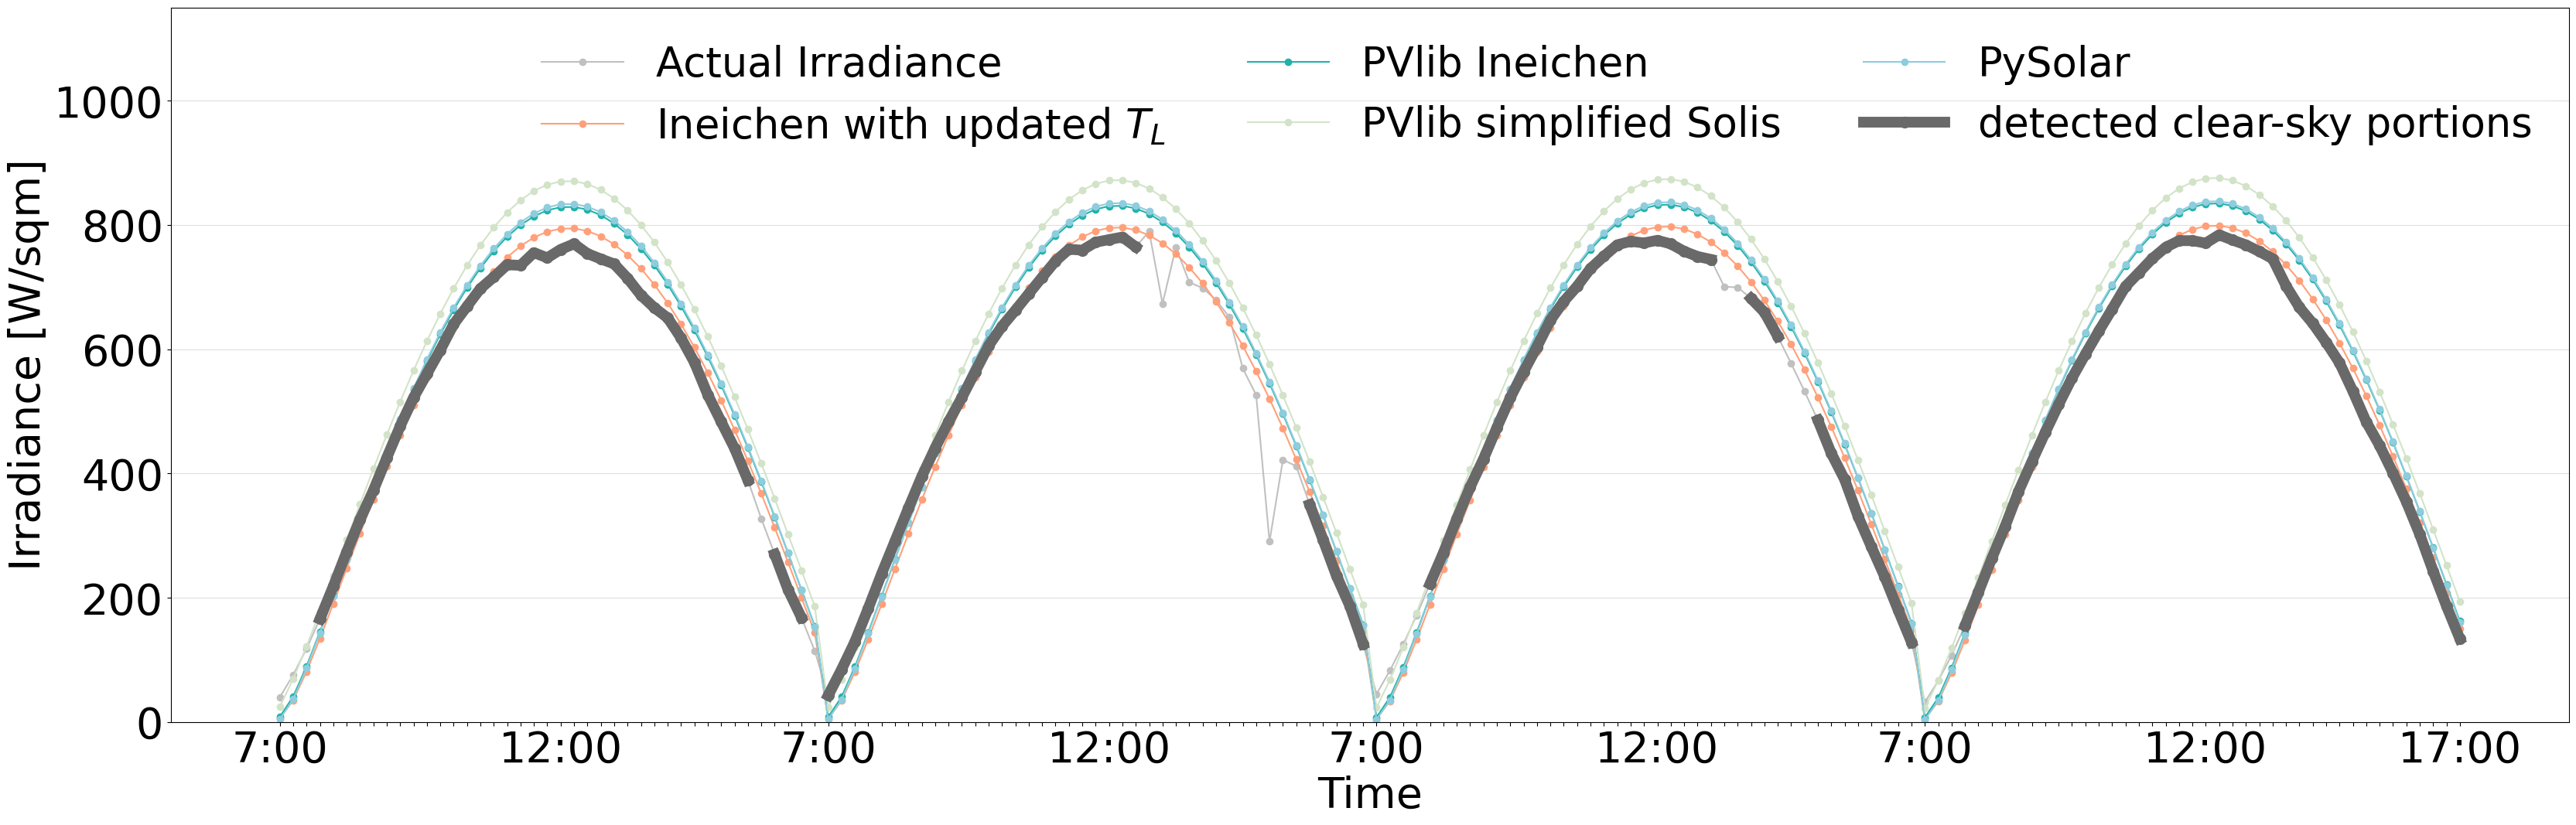

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Ensure 'Datetime' is in datetime format and localized
plot_df1['Datetime'] = pd.to_datetime(plot_df1['Datetime']).dt.tz_localize(None)

# Filter the first 4 unique dates
first_4_dates = plot_df1['Datetime'].dt.date.unique()[4:8]
filtered_df = plot_df1[plot_df1['Datetime'].dt.date.isin(first_4_dates)]

# Set the 'Datetime' column as the index for easy plotting
filtered_df.set_index('Datetime', inplace=True)

# Plot the data
plt.figure(figsize=[40, 12])

# Plot each column
plt.plot(filtered_df.index.map(str), filtered_df['I'].values, '-o', label='Actual Irradiance', color='silver')
plt.plot(filtered_df.index.map(str), filtered_df['ineichen_perez'].values, '-o', label='Ineichen with updated $T_L$', color=colors[0])
plt.plot(filtered_df.index.map(str), filtered_df['pvlib_ineichen'].values, '-o', label='PVlib Ineichen', color=colors[1])
plt.plot(filtered_df.index.map(str), filtered_df['pvlib_simplified_solis'].values, '-o', label='PVlib simplified Solis', color=colors[2])
plt.plot(filtered_df.index.map(str), filtered_df['pysolar_cos_zna'].values, '-o', label='PySolar', color=colors[3])

# Highlight the line of 'I' that has the mask is_clr_point
highlight_df = filtered_df.copy()
highlight_df['is_clr_point'] = highlight_df['is_clr_point'].replace(False, np.nan)
plt.plot(highlight_df.index.map(str), highlight_df['I']*highlight_df['is_clr_point'], '-o', label='detected clear-sky portions', color='dimgrey', linewidth=10, markersize=10)

# Set x-ticks to 7 AM of each day
tick_labels = ['7:00' if i % 41 == 0 else ('12:00' if i in [21, 62, 103, 144] else '') for i in range(len(filtered_df)-1)]+["17:00"]
plt.gca().set_xticklabels(tick_labels, fontsize=40)

# Set y-ticks from 0 to 1000
plt.yticks(fontsize=40)
plt.ylim(0, 1150)
plt.grid(axis='y', alpha=0.4)

# Move legend to the top inside the plot area, shift more to the right, and set transparent box boundary
legend = plt.legend(loc='upper right', fontsize=38, ncol=3, bbox_to_anchor=(1, 1), frameon=True)
legend.get_frame().set_edgecolor('none')
legend.get_frame().set_alpha(0.1)  # Adjust alpha for transparency

plt.xlabel('Time', fontsize=40)
plt.ylabel('Irradiance [W/sqm]', fontsize=40)
plt.savefig("paper_figs/clearsky_ts.pdf", bbox_inches='tight')
plt.show()


## Monthly TL by months

In [9]:
north_site = "site027"
south_site = "site014"
northeast_site = "site018"
bkk_site = "site048"
sites_list = [north_site, south_site, northeast_site, bkk_site]
plot_df2 = monthly_TL_df[monthly_TL_df.index.isin(sites_list)]



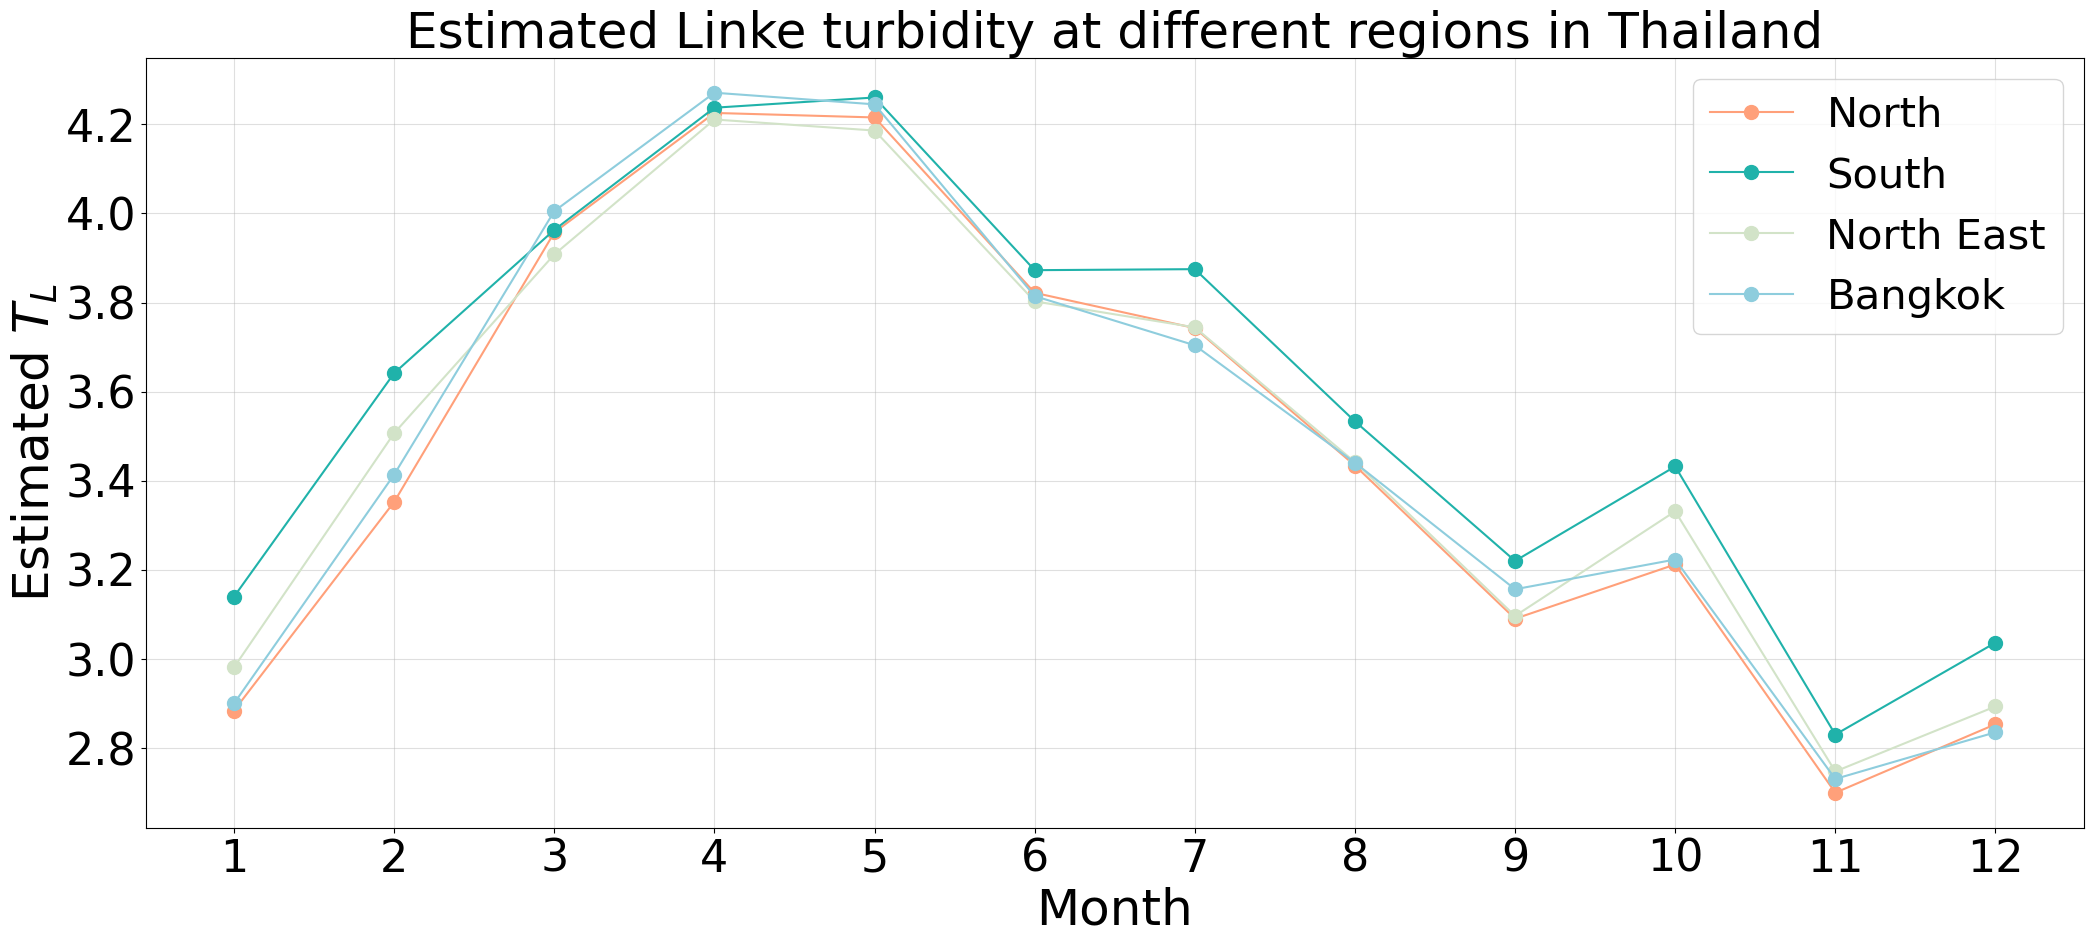

In [21]:
# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=[25, 10])
month_list = [i for i in range(1, 13)]
# Plot each site's TL
plt.plot(month_list, plot_df2.loc[north_site], '-o', label='North',color=colors[0],markersize=10)
plt.plot(month_list, plot_df2.loc[south_site], '-o', label='South',color=colors[1],markersize=10)
plt.plot(month_list, plot_df2.loc[northeast_site], '-o', label='North East',color=colors[2],markersize=10)
plt.plot(month_list, plot_df2.loc[bkk_site], '-o', label='Bangkok',color=colors[3],markersize=10)

# Add labels and legend
plt.xlabel('Month',fontsize=36)
plt.ylabel('Estimated $T_L$',fontsize=36)
plt.xticks(ticks=month_list,fontsize=32)
plt.yticks(fontsize=32)
plt.title('Estimated Linke turbidity at different regions in Thailand', fontsize=36)
plt.grid(alpha=0.4)
plt.legend(fontsize=30)
plt.savefig("paper_figs/clearsky_TL_bymonth.pdf", bbox_inches='tight')

# Show plot
plt.xticks(month_list)
plt.show()

## MAE & MBE by months (only test data)

In [139]:
test_all_sites_df['Datetime'] = test_all_sites_df['Datetime'].dt.tz_localize('Asia/Bangkok')

In [141]:
plot_df3 = test_all_sites_df[['site_name', 'Datetime']].merge(merged_all_clr, on=['site_name', 'Datetime'], how='left')
# plot_df3.to_csv("plot_df3.csv", index=False)
plot_df3

site_name                  Datetime  generated_power  ambient_temp  \
0        site001 2022-01-10 13:00:00+07:00            512.0          46.0   
1        site001 2022-01-15 17:00:00+07:00             88.0          44.0   
2        site001 2022-01-29 15:15:00+07:00            428.0          47.0   
3        site001 2022-01-15 08:30:00+07:00            264.0          34.0   
4        site001 2022-01-06 15:30:00+07:00            272.0          47.0   
...          ...                       ...              ...           ...   
912240   site019 2022-12-25 09:00:00+07:00            336.0          35.0   
912241   site044 2022-12-21 09:45:00+07:00            164.0          37.0   
912242   site012 2022-12-07 12:15:00+07:00            604.0          40.0   
912243   site031 2022-12-31 14:00:00+07:00            245.2          39.0   
912244   site017 2022-12-25 10:30:00+07:00            404.0          34.0   

               I  py_module_temp        date        zna        AM        Iclr  \
0       770.8973        57.45833  2022-01-10  37.061418  1.252145  849.743842   
1       139.0059        36.36666  2022-01-15  75.641050  3.974211  208.860144   
2       574.5332        51.76667  2022-01-29  51.756041  1.612818  638.984154   
3       318.5795        26.55833  2022-01-15  68.081385  2.663428  351.978038   
4       440.5023        48.31667  2022-01-06  58.445322  1.906042  526.717488   
...          ...             ...         ...        ...       ...         ...   
912240  428.1083        32.99166  2022-12-25  63.646629  2.244117  453.415757   
912241  660.9536        48.37058  2022-12-21  51.199199  1.593331  606.532427   
912242  820.3223        50.97500  2022-12-07  38.880117  1.283476  809.942721   
912243  638.5945        51.03333  2022-12-31  49.228178  1.529096  696.571195   
912244  757.7359        48.48333  2022-12-25  45.252662  1.418845  764.073273   

         cos_zna         k       lat        long  pvlib_ineichen  \
0       0.797990  0.907211  14.00523  100.519403      824.571455   
1       0.247996  0.665545  14.00523  100.519403      178.751273   
2       0.619011  0.899135  14.00523  100.519403      607.504013   
3       0.373289  0.905112  14.00523  100.519403      319.897813   
4       0.523312  0.836316  14.00523  100.519403      492.968142   
...          ...       ...       ...         ...             ...   
912240  0.443906  0.944185  17.01100   99.777600      398.571521   
912241  0.626615  1.089725  13.51000  102.177700      603.138707   
912242  0.778461  1.012815  15.82260  104.122000      780.109948   
912243  0.653048  0.916768  17.85612  103.764700      637.733315   
912244  0.703982  0.991706  14.96980  103.081800      695.061754   

        pvlib_simplified_solis      pysolar  ineichen_perez pysolar_cos_zna  
0                   864.750086  1037.132567      788.824059      827.621357  
1                   209.020243   706.894952      164.935027      175.307037  
2                   641.300759   977.821827      580.598795      605.282611  
3                   347.843955   851.073514      300.464893      317.696558  
4                   523.263664   946.949801      470.324930      495.550209  
...                        ...          ...             ...             ...  
912240              430.422438   901.908007      406.704597      400.362444  
912241              650.546034   986.135268      623.620047      617.926862  
912242              837.404125  1020.492463      794.512114      794.413602  
912243              680.666213   997.456518      654.308551      651.387219  
912244              745.844822  1011.985153      708.092228      712.419055  

[912245 rows x 19 columns]

In [67]:
plot_df3 = pd.read_csv("plot_df3.csv", parse_dates=['Datetime'])

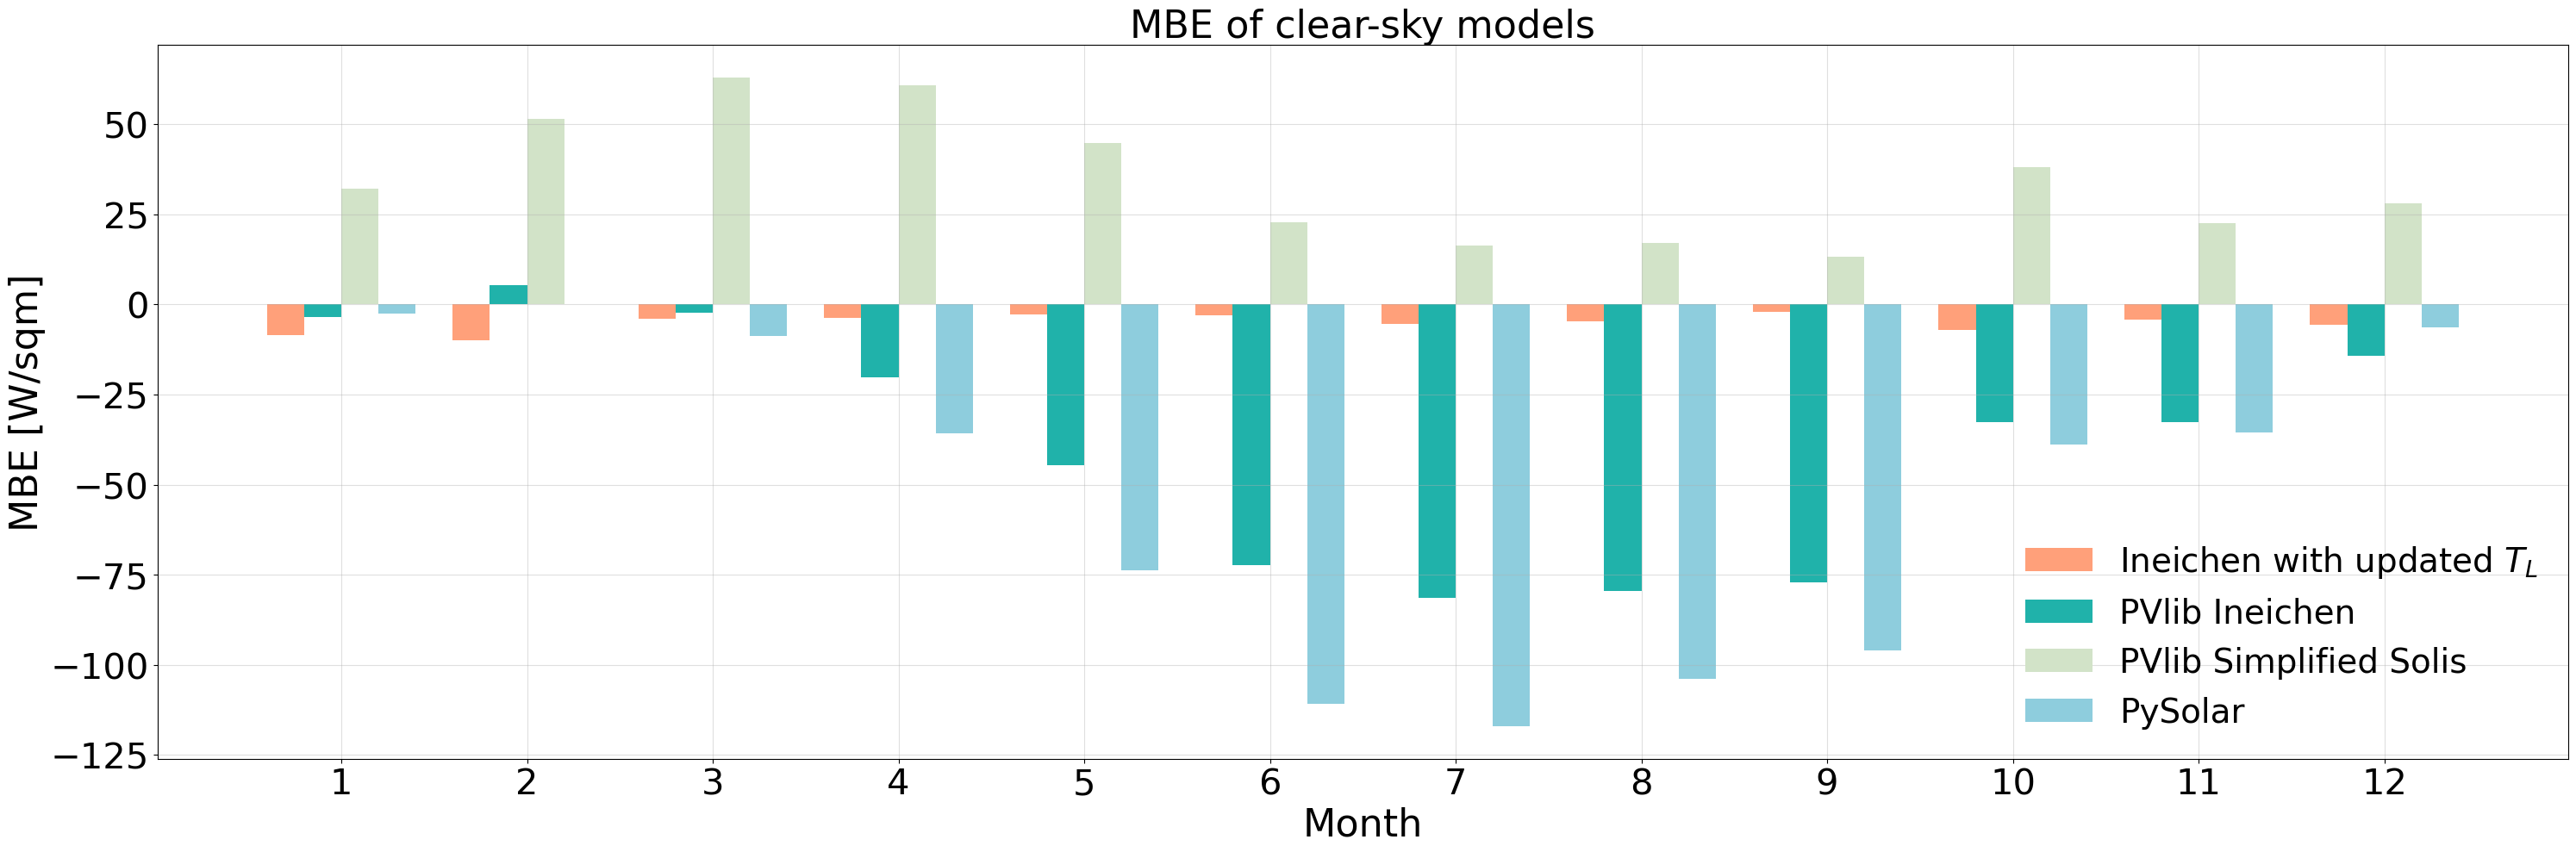

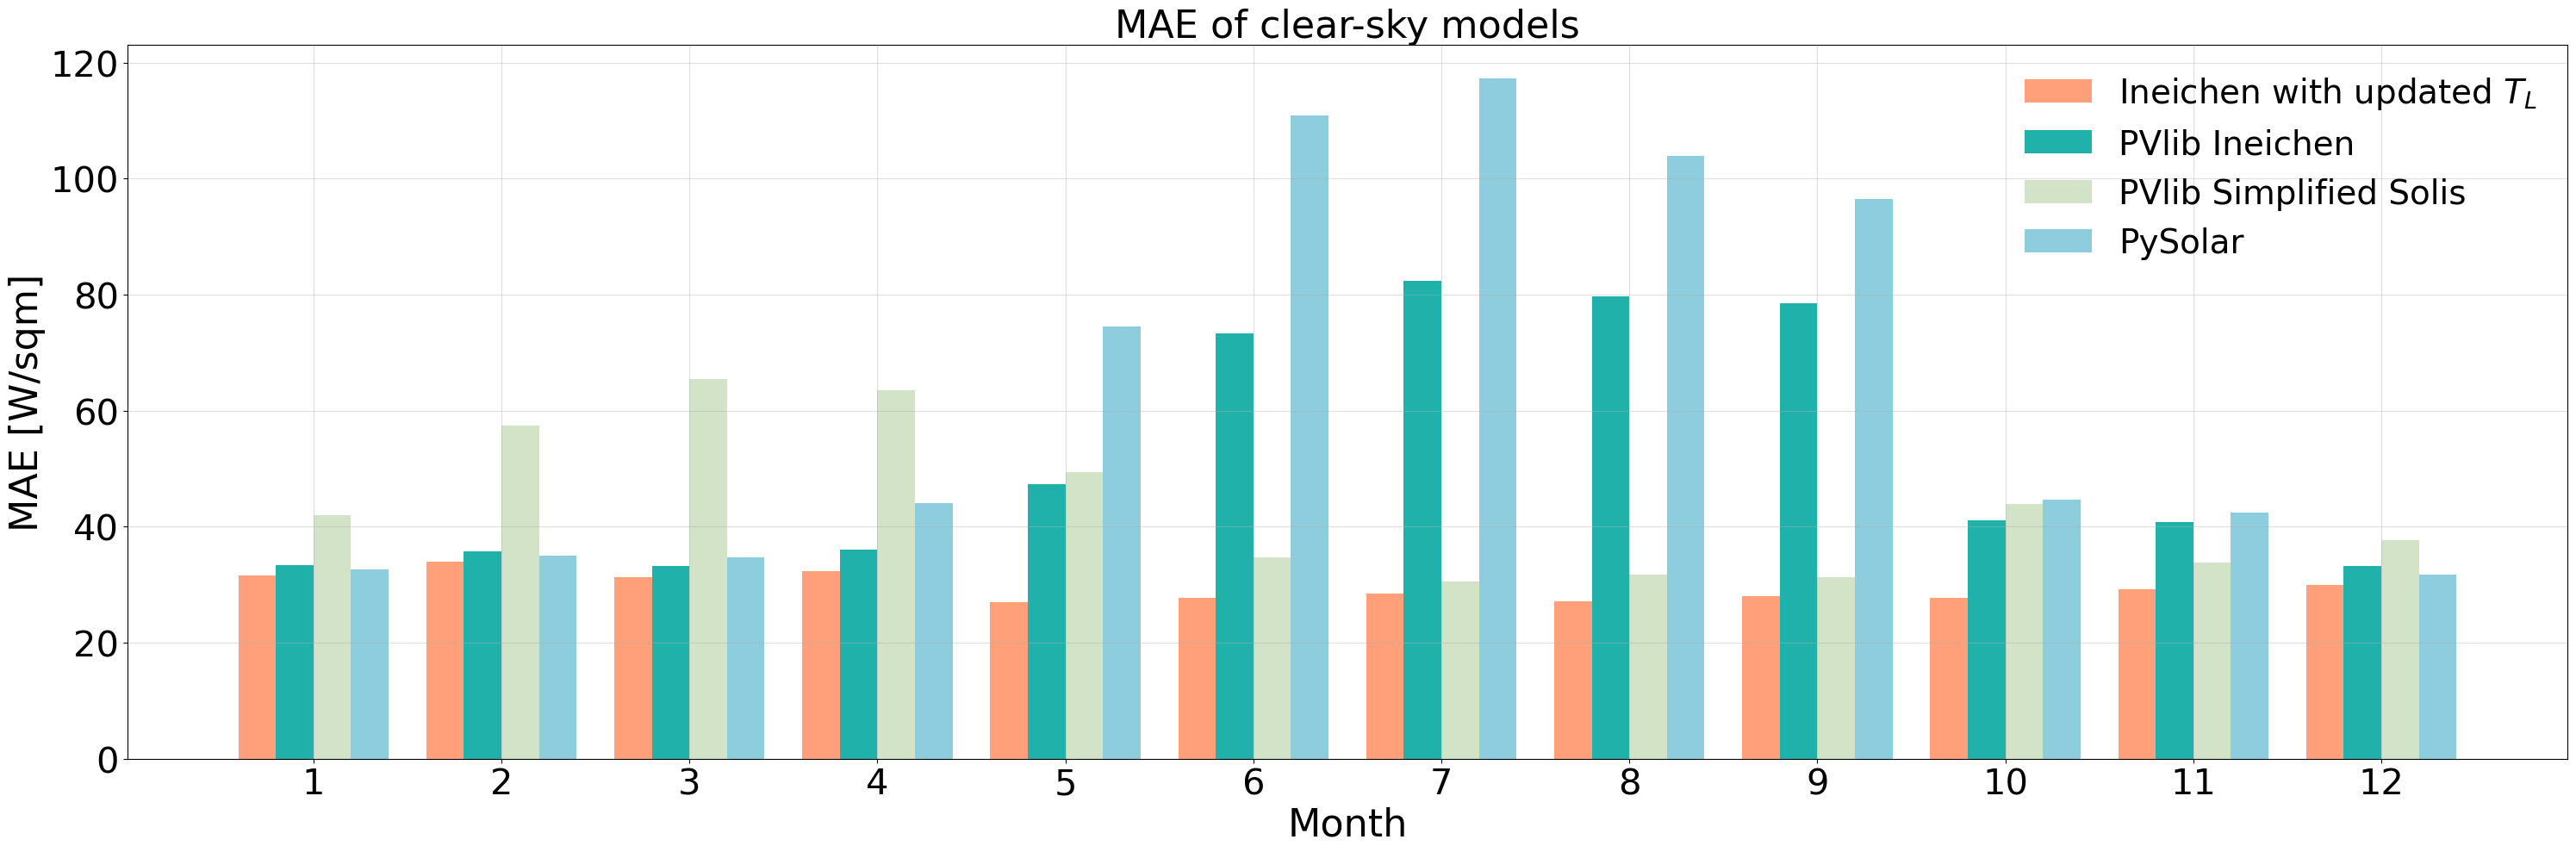

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'Datetime' is in datetime format and localized
plot_df3['Datetime'] = pd.to_datetime(plot_df3['Datetime']).dt.tz_localize(None)

# Calculate MBE for each method
plot_df3['MBE_ineichen_perez'] = plot_df3['ineichen_perez'] - plot_df3['I']
plot_df3['MBE_pvlib_ineichen'] = plot_df3['pvlib_ineichen'] - plot_df3['I']
plot_df3['MBE_pvlib_simplified_solis'] = plot_df3['pvlib_simplified_solis'] - plot_df3['I']
plot_df3['MBE_pysolar_cos_zna'] = plot_df3['pysolar_cos_zna'] - plot_df3['I']

# Group by month and calculate mean MBE
monthly_mbe = plot_df3[['MBE_ineichen_perez', 'MBE_pvlib_ineichen', 
                        'MBE_pvlib_simplified_solis', 'MBE_pysolar_cos_zna',
                        'Datetime']].groupby(plot_df3['Datetime'].dt.month).mean()

# Calculate MAE for each method
plot_df3['MAE_ineichen_perez'] = (plot_df3['ineichen_perez'] - plot_df3['I']).abs()
plot_df3['MAE_pvlib_ineichen'] = (plot_df3['pvlib_ineichen'] - plot_df3['I']).abs()
plot_df3['MAE_pvlib_simplified_solis'] = (plot_df3['pvlib_simplified_solis'] - plot_df3['I']).abs()
plot_df3['MAE_pysolar_cos_zna'] = (plot_df3['pysolar_cos_zna'] - plot_df3['I']).abs()

# Group by month and calculate mean MAE
monthly_mae = plot_df3[['MAE_ineichen_perez', 'MAE_pvlib_ineichen', 
                        'MAE_pvlib_simplified_solis', 'MAE_pysolar_cos_zna',
                        'Datetime']].groupby(plot_df3['Datetime'].dt.month).mean()

# Plot settings
fig_size = (30, 10)
bar_width = 0.2
months = monthly_mbe.index
fontsize_title = 32
fontsize_labels = 32
fontsize_legend = 28
fontsize_ticks = 30
alpha_grid = 0.4

# Function to create bar plots
def create_bar_plot(data, ylabel, title, legend_loc, filename):
    fig, ax = plt.subplots(figsize=fig_size)

    ax.bar(months - 1.5 * bar_width, data.iloc[:, 0], width=bar_width, label='Ineichen with updated $T_L$', color=colors[0])
    ax.bar(months - 0.5 * bar_width, data.iloc[:, 1], width=bar_width, label='PVlib Ineichen', color=colors[1])
    ax.bar(months + 0.5 * bar_width, data.iloc[:, 2], width=bar_width, label='PVlib Simplified Solis', color=colors[2])
    ax.bar(months + 1.5 * bar_width, data.iloc[:, 3], width=bar_width, label='PySolar', color=colors[3])

    ax.set_title(title, fontsize=fontsize_title)
    ax.set_xlabel('Month', fontsize=fontsize_labels)
    ax.set_ylabel(ylabel, fontsize=fontsize_labels)

    ax.legend(fontsize=fontsize_legend, frameon=False, loc=legend_loc)

    ax.set_xticks(months)
    ax.tick_params(axis='x', labelsize=fontsize_ticks)
    ax.tick_params(axis='y', labelsize=fontsize_ticks)

    ax.grid(True, alpha=alpha_grid)
    plt.tight_layout()
    fig.savefig(filename)
    plt.show()

# Create MBE plot
create_bar_plot(monthly_mbe, 'MBE [W/sqm]', 'MBE of clear-sky models', 'lower right', 'paper_figs/clearsky_mbe_bymonth.pdf')

# Create MAE plot
create_bar_plot(monthly_mae, 'MAE [W/sqm]', 'MAE of clear-sky models', 'upper right', 'paper_figs/clearsky_mae_bymonth.pdf')


## Monthly TL map plots

In [34]:
monthly_TL_df = monthly_TL_df.reset_index()
plant_df.rename(columns={'site_name':'sitename'},inplace=True)

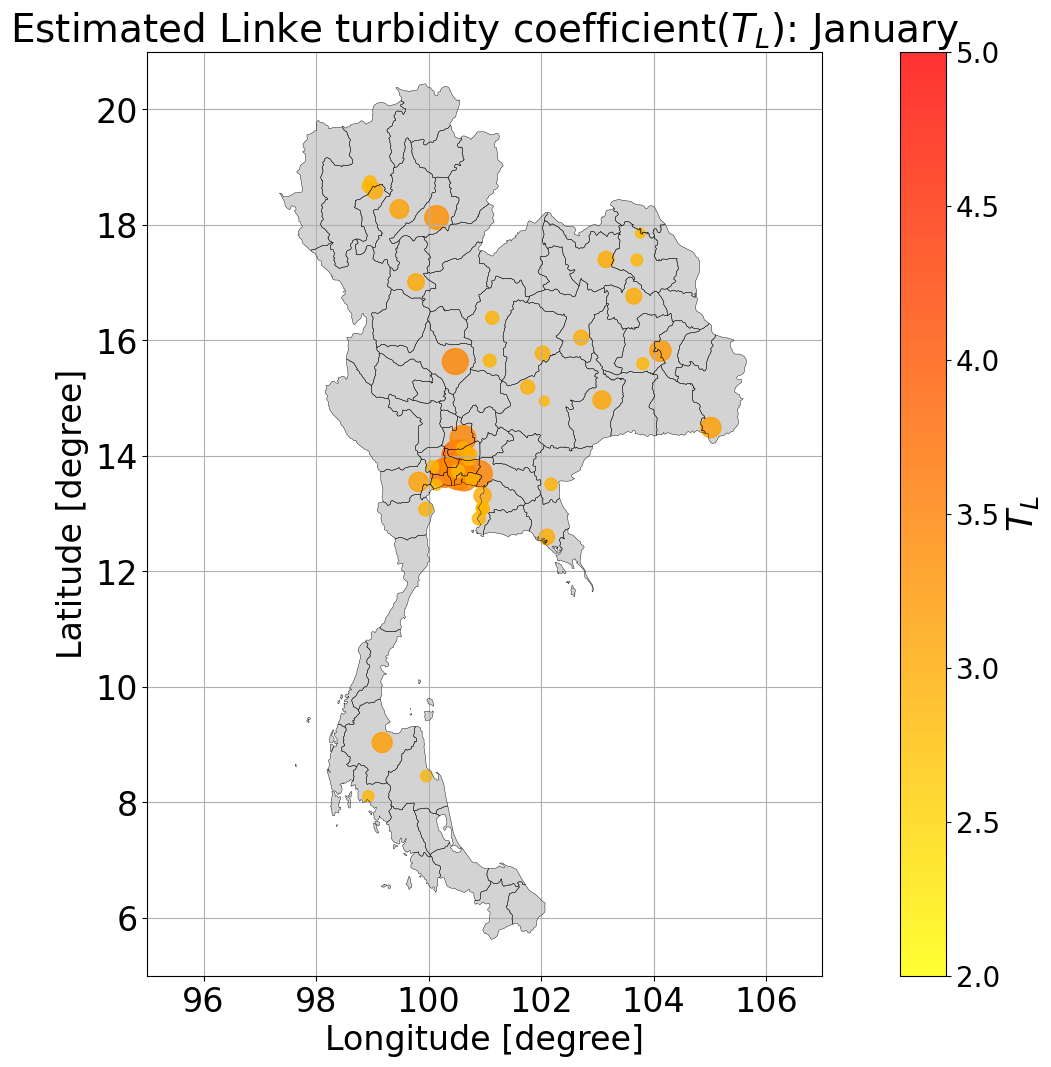

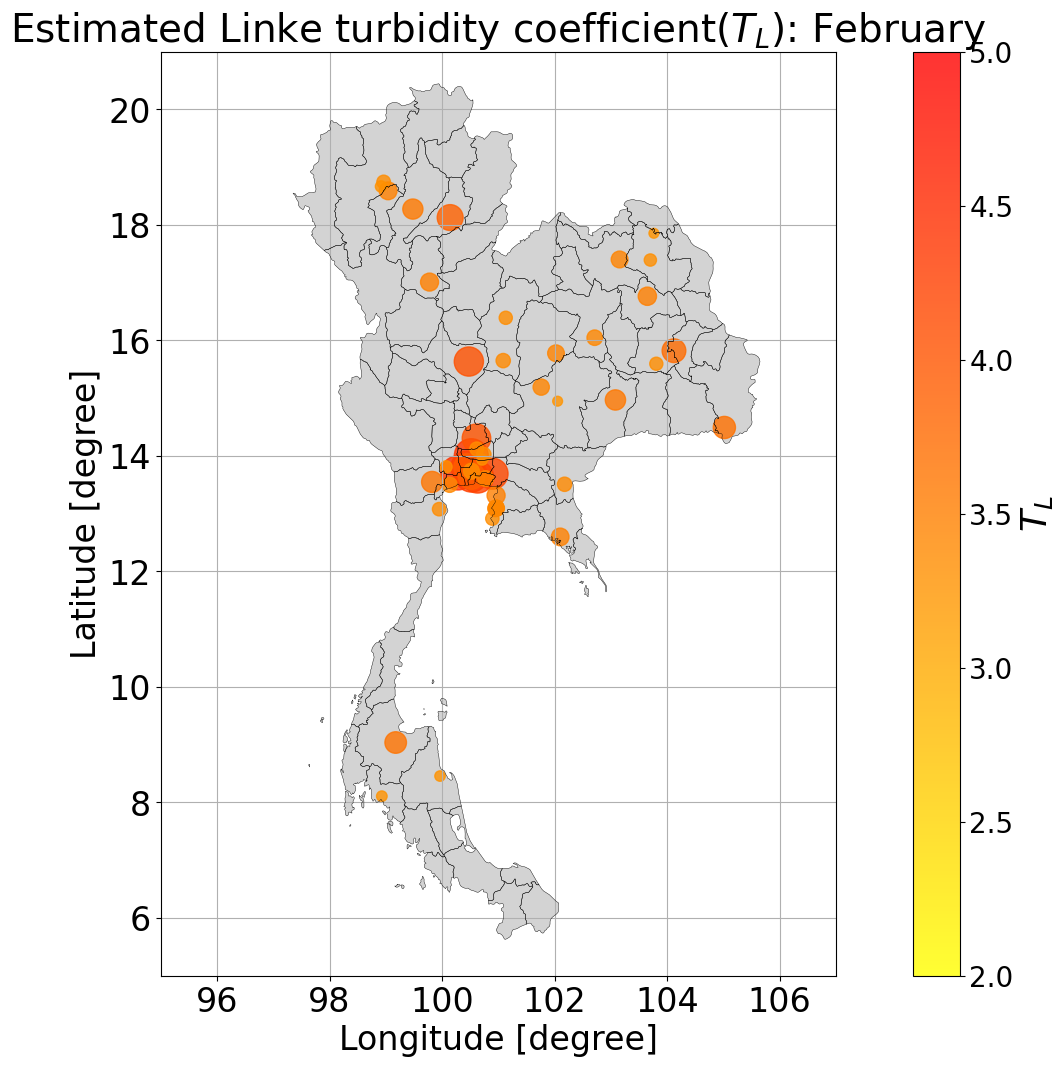

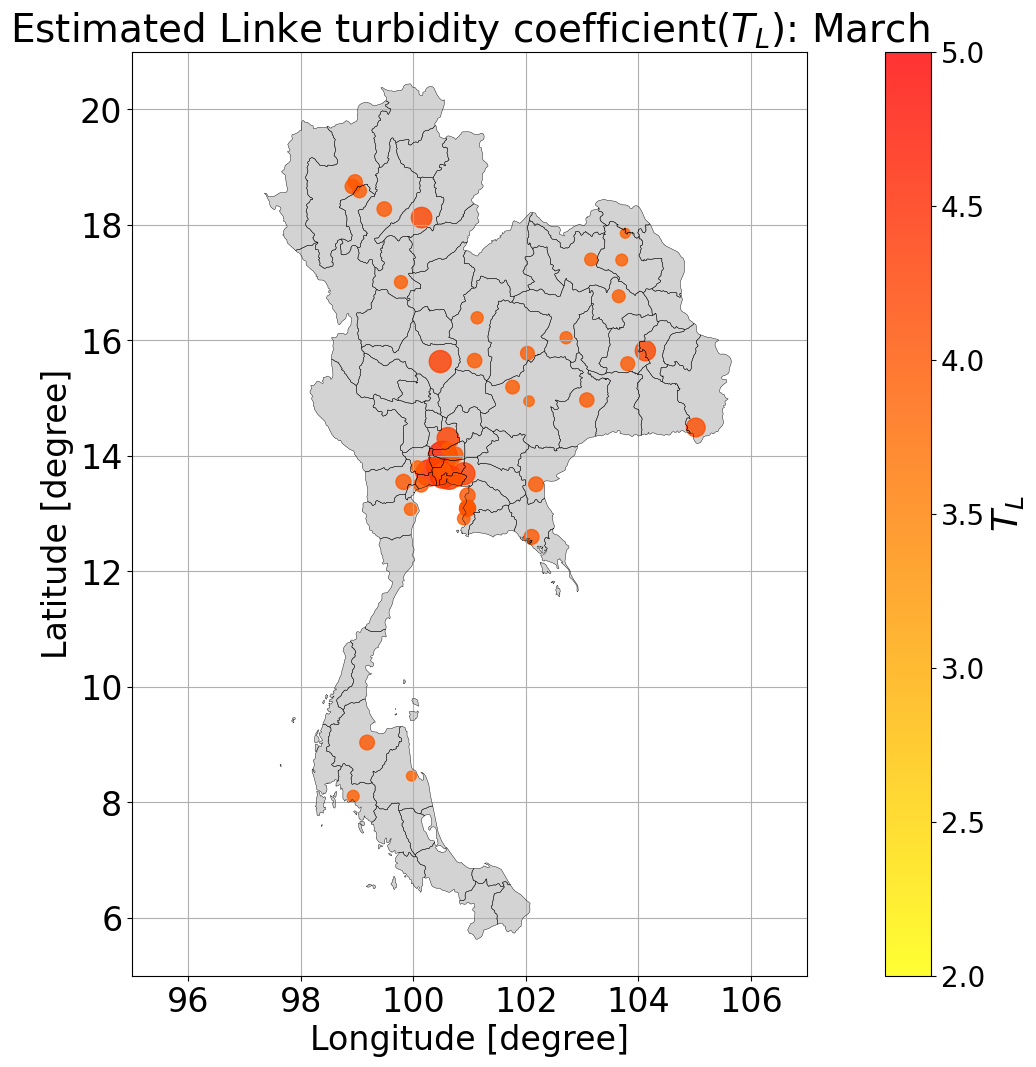

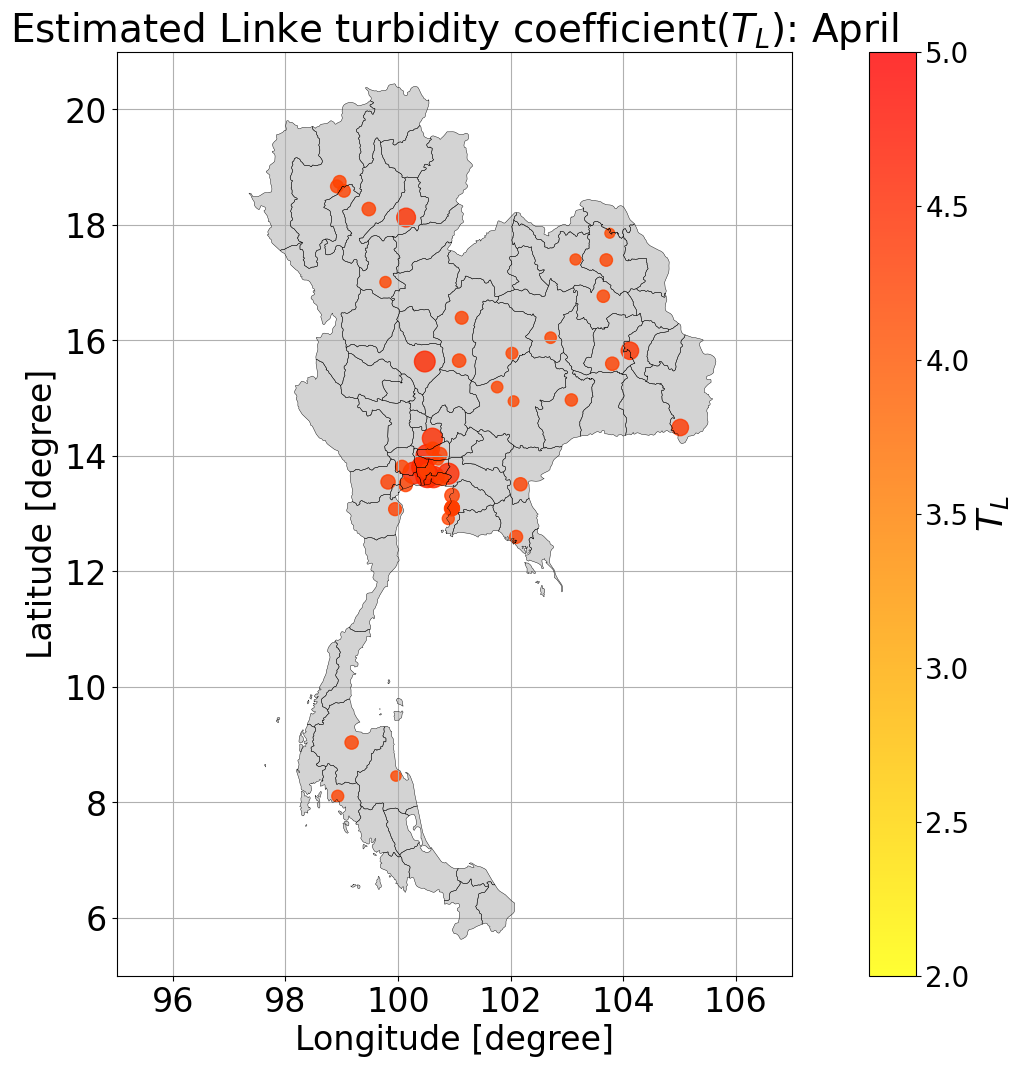

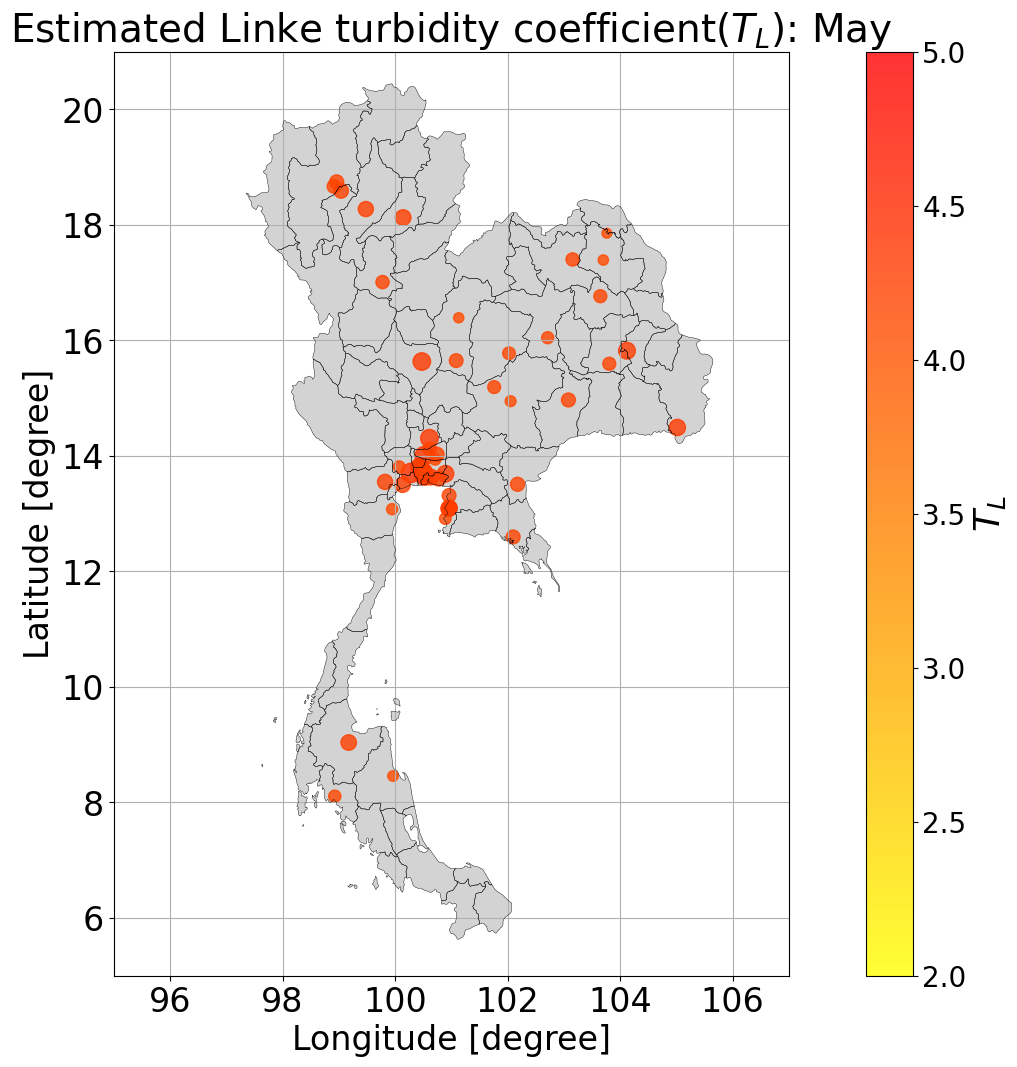

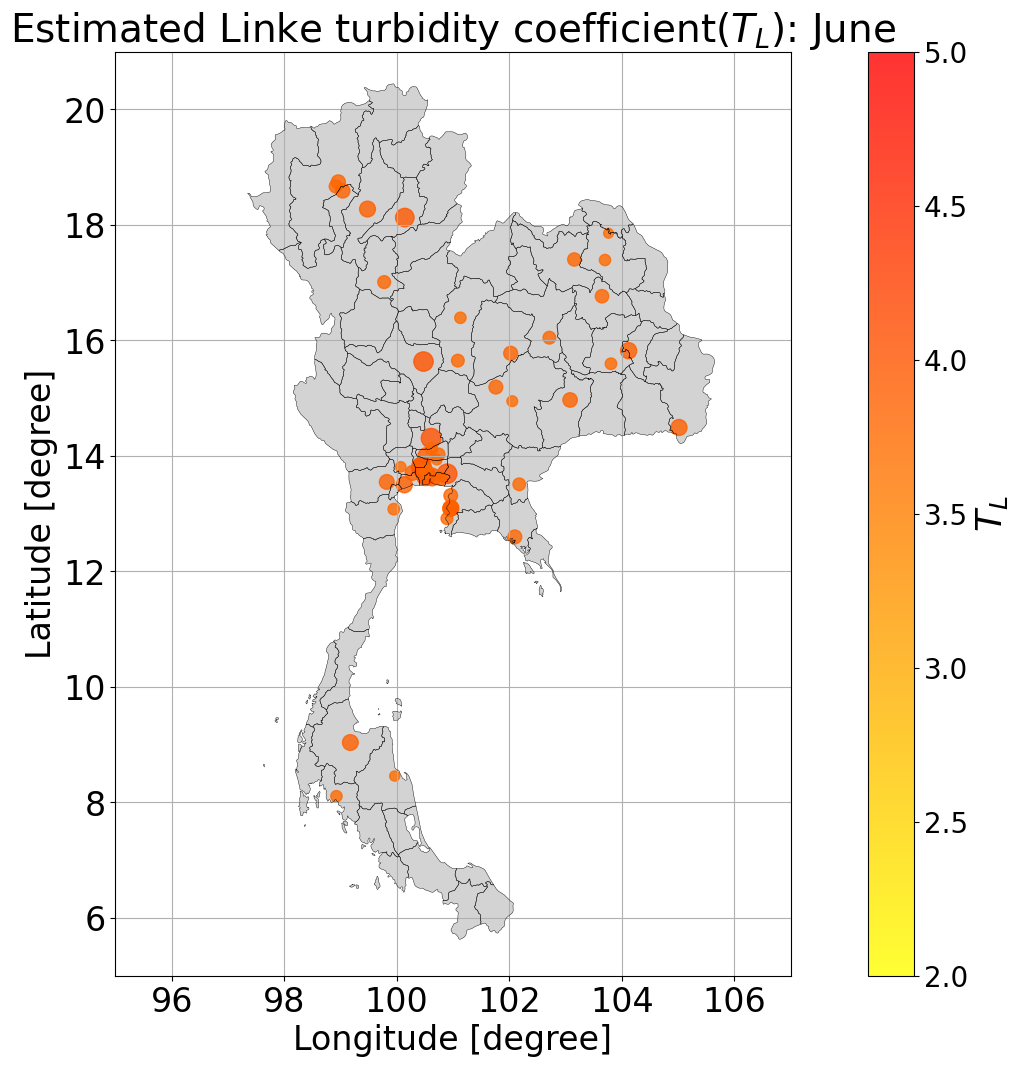

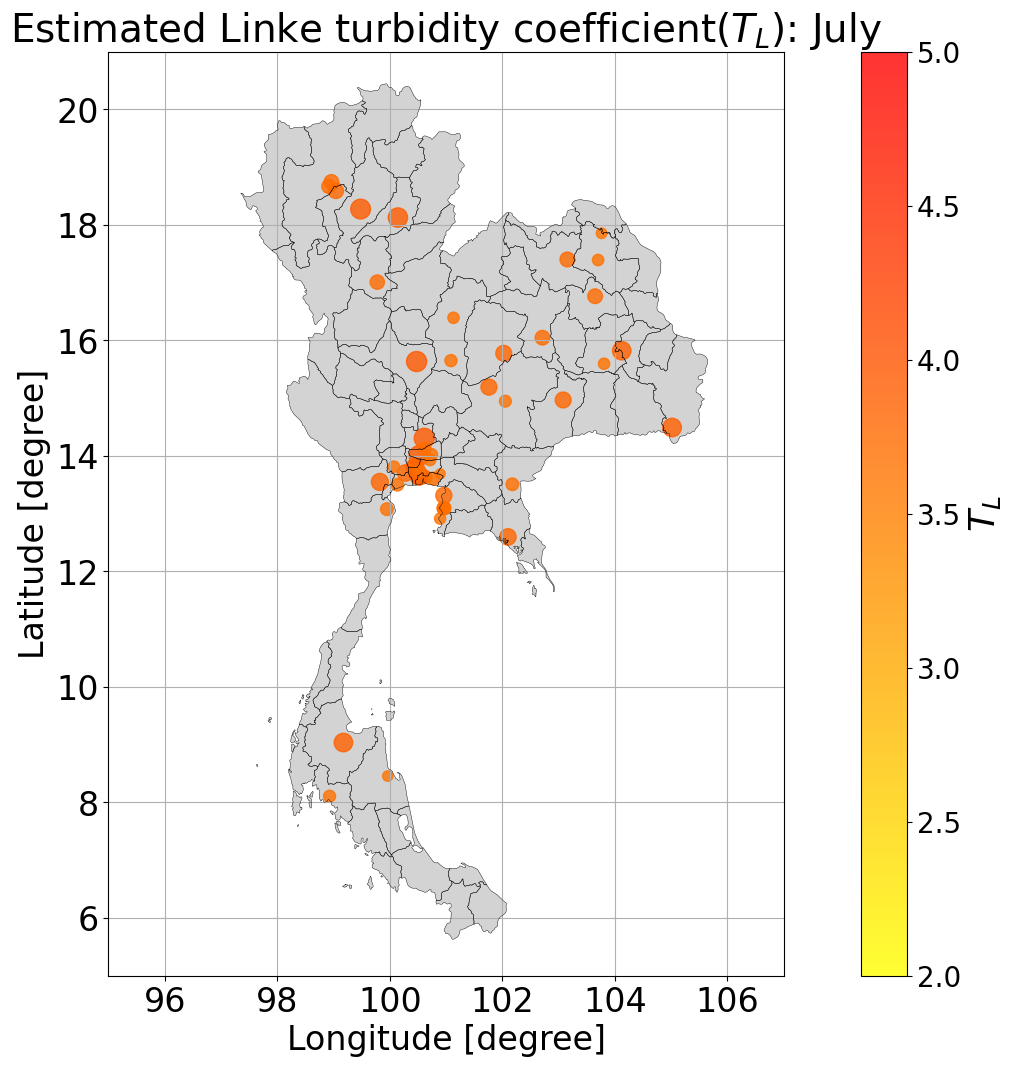

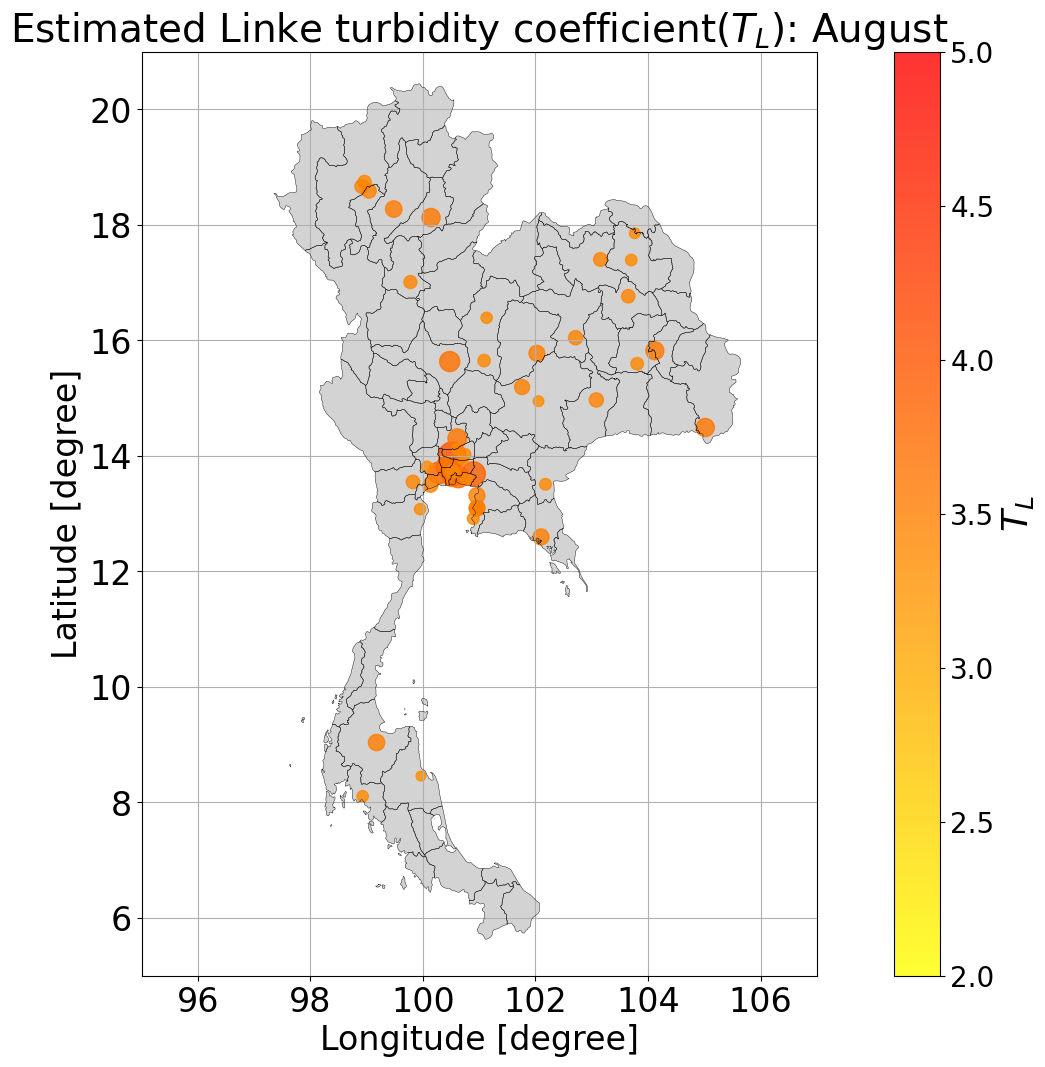

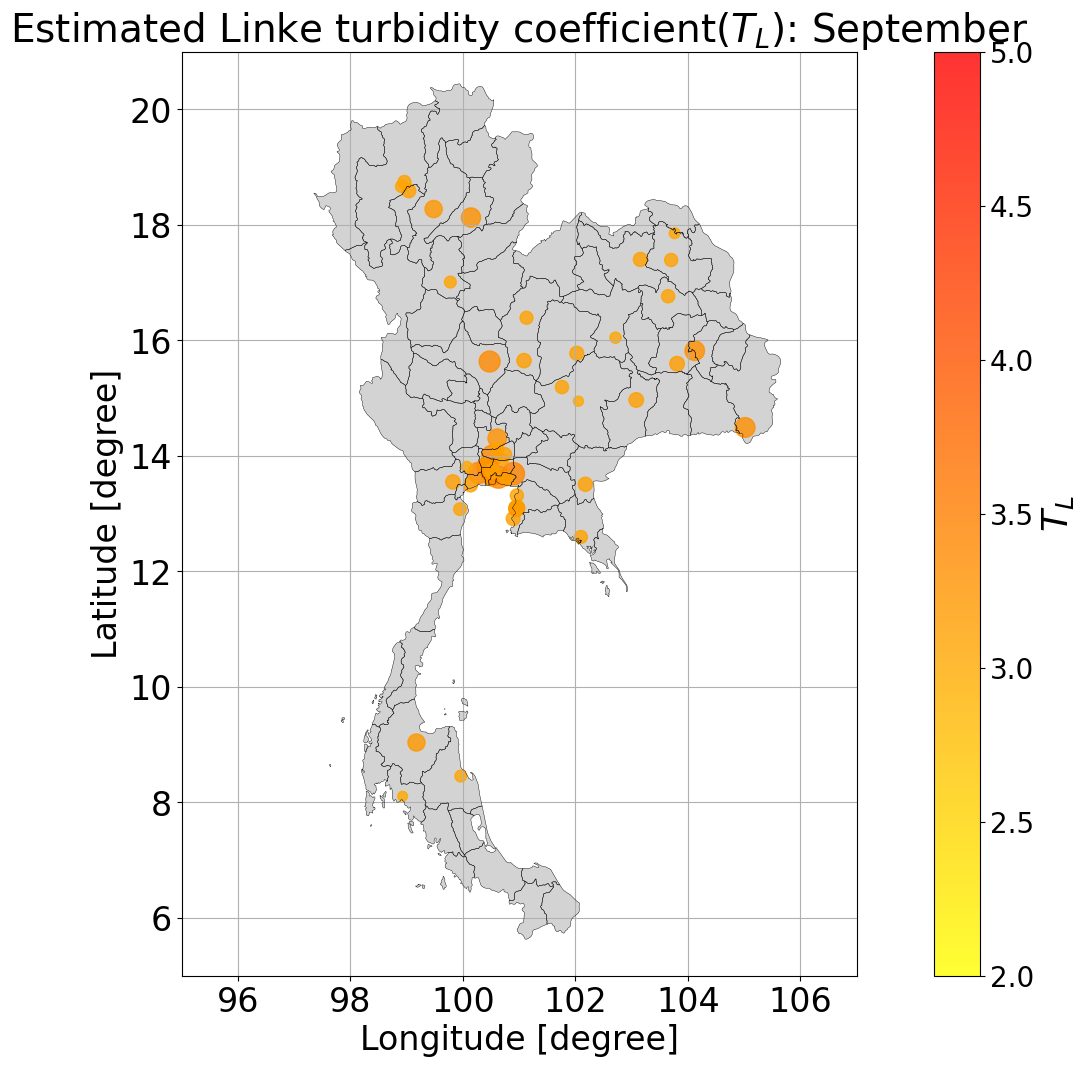

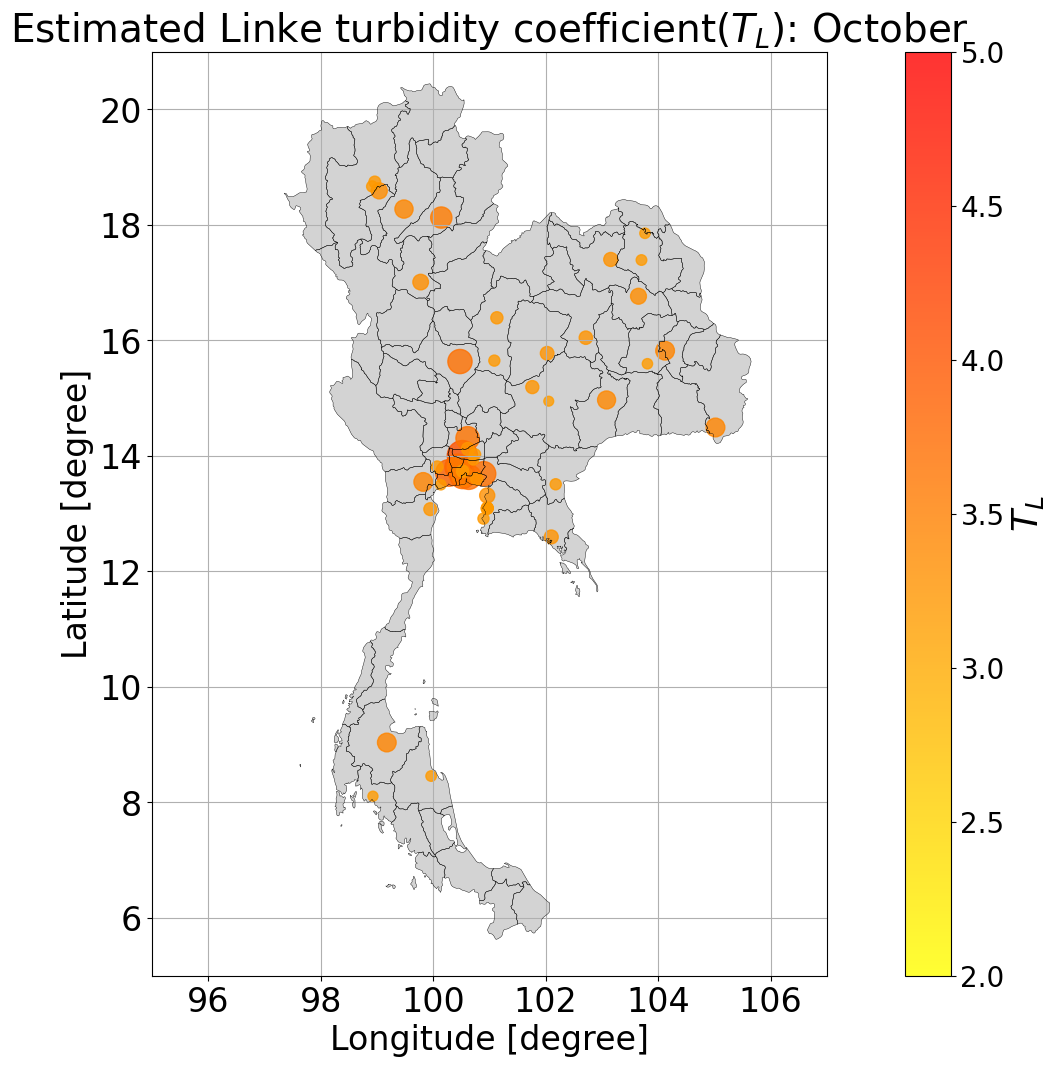

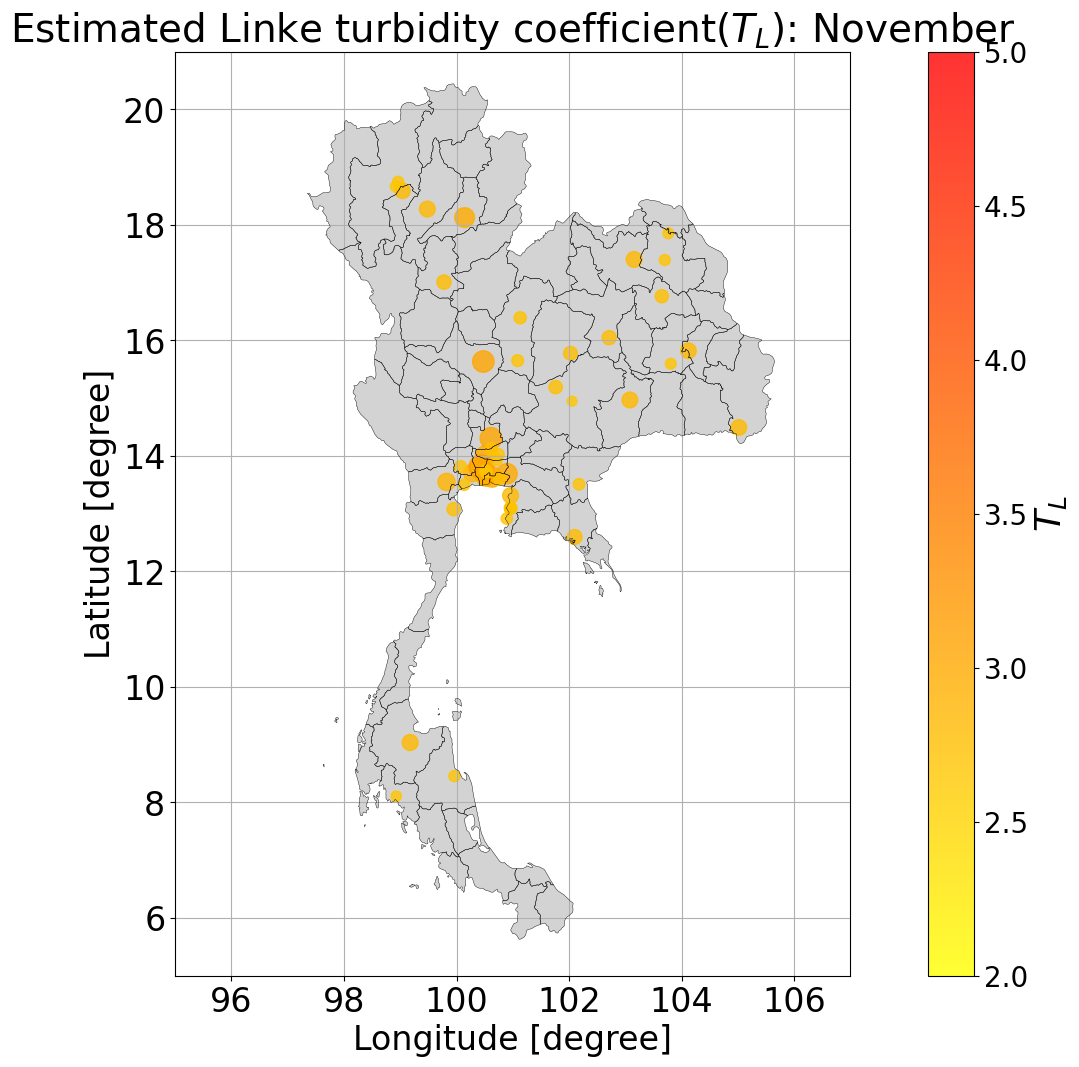

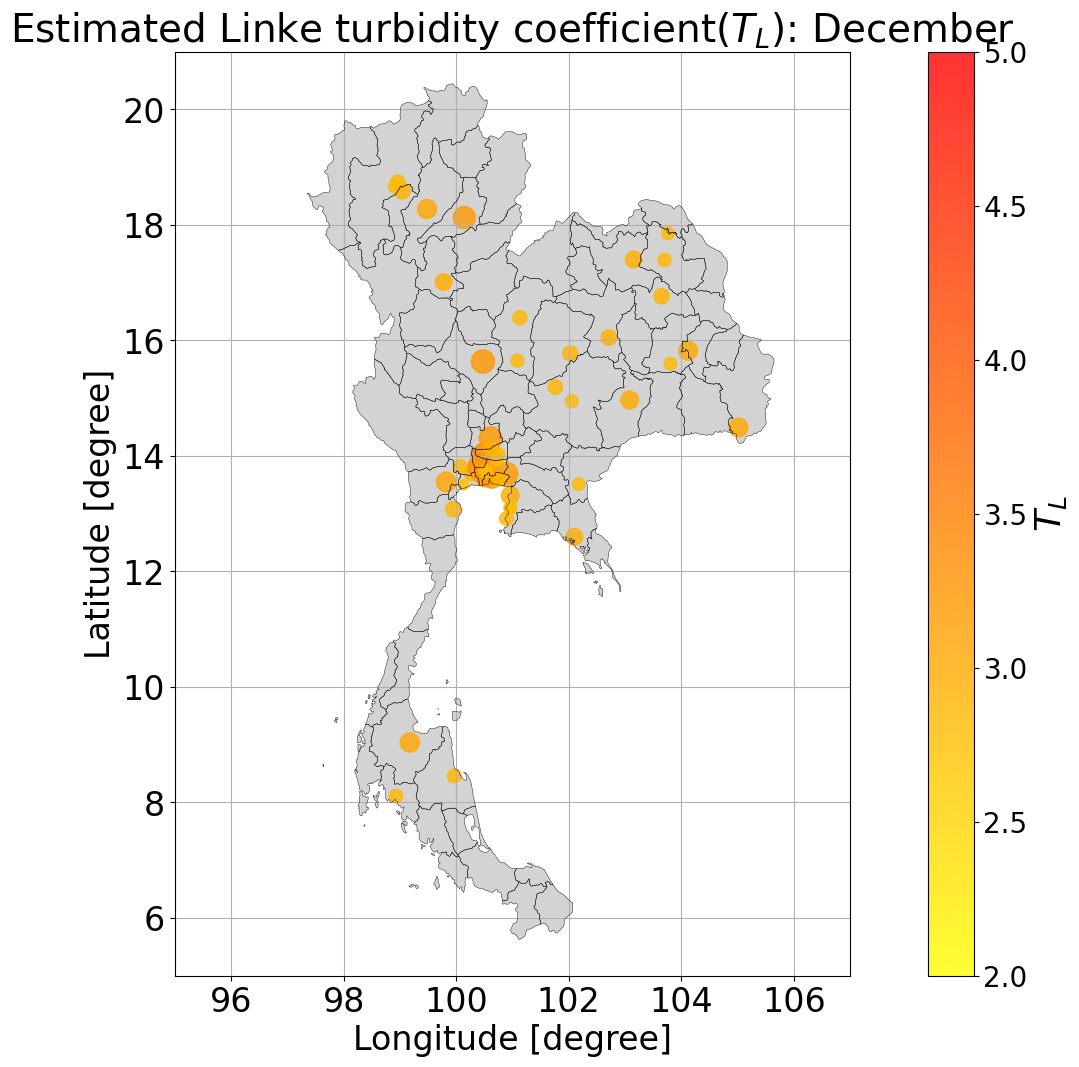

In [41]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Define month names
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Load the datasets
# plant_df = pd.read_csv('path_to_plant_df.csv')  # Adjust the path to the file
# monthly_TL_df = pd.read_csv('path_to_monthly_TL_df.csv')  # Adjust the path to the file
worldmap = gpd.read_file('thailand.json')

# Merge plant_df and monthly_TL_df on 'sitename'
merged_df = pd.merge(plant_df, monthly_TL_df, on='sitename')

# Loop through each month and create a plot
for month in range(1, 13):
    month_col = f'month {month}'
    
    fig, ax = plt.subplots(figsize=(20, 12))
    worldmap.plot(color='lightgray', ax=ax)
    worldmap.boundary.plot(ax=ax, color='black', linewidth=0.3)
    
    x = merged_df['long']
    y = merged_df['lat']
    z = merged_df[month_col]
    
    # Scale marker size based on TL values
    sizes = (z - z.min() + 0.1) * 500  # Adjust the multiplier for size as needed

    scatter = ax.scatter(x, y, s=sizes, c=z, alpha=0.8, cmap='autumn_r', vmin=2, vmax=5)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$T_{L}$', fontsize=26)
    cbar.ax.tick_params(labelsize=20)
    
    plt.grid(True)
    plt.title(f'Estimated Linke turbidity coefficient($T_L$): {month_names[month-1]}', fontsize=28)
    plt.xlabel('Longitude [degree]', fontsize=24)
    plt.ylabel('Latitude [degree]', fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlim([95, 107])
    plt.ylim([5, 21])
    
    # Save the plot for each month (optional)
    plt.savefig(f'TL_map/clearsky_TLmap_month{("0"+str(month))[-2:]}.pdf', bbox_inches='tight')
    
    # Show the plot
    plt.show()


In [251]:
monthly_TL_df.describe()

level_0      index    month 1    month 2    month 3    month 4  \
count  53.000000  53.000000  53.000000  53.000000  53.000000  53.000000   
mean   26.000000  26.000000   3.045476   3.563396   4.019998   4.288593   
std    15.443445  15.443445   0.242514   0.311968   0.165763   0.120879   
min     0.000000   0.000000   2.825949   3.260213   3.840794   4.154423   
25%    13.000000  13.000000   2.876922   3.358222   3.913906   4.214170   
50%    26.000000  26.000000   2.920381   3.419689   3.963109   4.247860   
75%    39.000000  39.000000   3.139574   3.641511   4.005218   4.272329   
max    52.000000  52.000000   3.753245   4.368336   4.595743   4.612486   

         month 5    month 6    month 7    month 8    month 9   month 10  \
count  53.000000  53.000000  53.000000  53.000000  53.000000  53.000000   
mean    4.227965   3.833973   3.744228   3.504353   3.163704   3.344343   
std     0.067126   0.079911   0.090734   0.137157   0.111646   0.205604   
min     4.110500   3.716457   3.620265   3.355035   3.014955   3.170347   
25%     4.185687   3.782575   3.671913   3.407981   3.089959   3.198874   
50%     4.231574   3.815648   3.709407   3.458064   3.127711   3.241741   
75%     4.260412   3.872637   3.801400   3.535541   3.221376   3.431911   
max     4.400306   4.017106   3.938153   4.028992   3.433933   4.021013   

        month 11   month 12  
count  53.000000  53.000000  
mean    2.796556   2.937986  
std     0.122317   0.151787  
min     2.667149   2.753542  
25%     2.708127   2.832756  
50%     2.746988   2.880973  
75%     2.826802   3.019526  
max     3.179682   3.363419